In [1]:
import pandas as pd
from datetime import datetime as dt, timedelta
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# To display all the columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
customer=pd.read_csv('olist_customers_dataset.csv').drop_duplicates()
order=pd.read_csv('olist_orders_dataset.csv').drop_duplicates()
orderItem=pd.read_csv('olist_order_items_dataset.csv').drop_duplicates()
payment=pd.read_csv('olist_order_payments_dataset.csv').drop_duplicates()
review=pd.read_csv('olist_order_reviews_dataset.csv').drop_duplicates()
product=pd.read_csv('olist_products_dataset.csv').drop_duplicates()
seller=pd.read_csv('olist_sellers_dataset.csv').drop_duplicates()
geolocation = pd.read_csv('olist_geolocation_dataset.csv').drop_duplicates()
productCategoryTranslation = pd.read_csv('product_category_name_translation.csv').drop_duplicates()

In [4]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
order['order_purchase_timestamp']=pd.to_datetime(order['order_purchase_timestamp'])
order['order_approved_at']=pd.to_datetime(order['order_approved_at'])
order['order_delivered_carrier_date']=pd.to_datetime(order['order_delivered_carrier_date'])
order['order_delivered_customer_date']=pd.to_datetime(order['order_delivered_customer_date'])
order['order_estimated_delivery_date']=pd.to_datetime(order['order_estimated_delivery_date'])

In [6]:
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
order.shape

(99441, 8)

In [8]:
order.dropna(subset=['order_delivered_customer_date','order_purchase_timestamp'], inplace=True)
order["first_purchase_date"] = order["order_purchase_timestamp"]
order['delivery_duration'] = (order['order_delivered_customer_date'] - order['order_purchase_timestamp']).dt.days

In [9]:
#canceled orders are dropped.I consider only the records which have a order status of delivered or will be delivered..
canceledIndex = order.dropna()[order.order_status == 'canceled'].index
order.drop(index = canceledIndex, inplace = True)
order.shape

(96470, 10)

In [10]:
review.isna().sum()[review.isna().sum() > 0] / len(review) * 100
# There are 88.34% of review_comment_title and 58.7% of review_comment_message as null values.

review_comment_title      88.341530
review_comment_message    58.702532
dtype: float64

In [11]:
review.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [12]:
review.info()
# review[review['review_score'] == 0]
# review[review['review_score'].isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [13]:
# review.dropna(inplace = True)
reviewScore = review.review_score.value_counts(normalize = True) * 100
reviewScore
# From this I could clearly understand that customers were mostly satisfied by the company

review_score
5    57.776344
4    19.291704
1    11.513344
3     8.242965
2     3.175643
Name: proportion, dtype: float64

In [14]:
print('Number of Records:',product.shape[0])
print('Number of Columns:',product.shape[1])

Number of Records: 32951
Number of Columns: 9


In [15]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [16]:
product.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [17]:
orderItem.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [18]:
customer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [19]:
seller.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [20]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [21]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [22]:
seller.shape

(3095, 4)

In [23]:
customer.shape

(99441, 5)

In [24]:
mergedData = customer.merge(order, on = 'customer_id')\
        .merge(orderItem, on = 'order_id')\
        .merge(product, on = 'product_id')\
        .merge(payment, on = 'order_id')\
        .merge(seller, on = 'seller_id')\
        .merge(productCategoryTranslation, on = 'product_category_name')\
        .merge(review, on = 'order_id', how = 'left')
mergedData.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

   customer_zip_code_prefix    customer_city customer_state  \
0                     14409           franca             SP   
1                     68030         santarem             PA   
2                     68030         santarem             PA   
3                     92480  nova santa rita             RS   
4                     25931             mage             RJ   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8    delivered      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7    delivered      2018-02-03 19:45:40   

    order_approved_at order_delivered_carrier_date  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57   
1 2017-11-10 00:47:48          2017-11-22 01:43:37   
2 2017-11-10 00:47:48          2017-11-22 01:43:37   
3 2017-05-08 22:22:56          2017-05-19 20:16:31   
4 2018-02-04 22:29:19          2018-02-19 18:21:47   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-05-25 10:35:35                    2017-06-05   
1           2017-11-28 00:09:50                    2017-12-19   
2           2017-11-28 00:09:50                    2017-12-19   
3           2017-05-26 09:54:04                    2017-06-12   
4           2018-02-28 21:09:00                    2018-03-22   

  first_purchase_date  delivery_duration  order_item_id  \
0 2017-05-16 15:05:35                  8              1   
1 2017-11-09 00:50:13                 18              1   
2 2017-11-09 00:50:13                 18              2   
3 2017-05-07 20:11:26                 18              1   
4 2018-02-03 19:45:40                 25              1   

                         product_id                         seller_id  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
2  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
3  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
4  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   

   shipping_limit_date   price  freight_value product_category_name  \
0  2017-05-22 15:22:12  124.99          21.88     moveis_escritorio   
1  2017-11-23 00:47:18  112.99          24.90     moveis_escritorio   
2  2017-11-23 00:47:18  112.99          24.90     moveis_escritorio   
3  2017-05-22 22:22:56  124.99          15.62     moveis_escritorio   
4  2018-02-18 21:29:19  106.99          30.59     moveis_escritorio   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 41.0                      1141.0                 1.0   
1                 41.0                      1141.0                 1.0   
2                 41.0                      1141.0                 1.0   
3                 41.0                      1141.0                 1.0   
4                 41.0                      1141.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0            8683.0               54.0               64.0              31.0   
1            8683.0               54.0               64.0              31.0   
2            8683.0               54.0               64.0              31.0   
3            8683.0               54.0       

In [25]:
mergedData.shape

(114051, 42)

In [26]:
mergedData.drop_duplicates()

customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3       f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4       6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   
...                                  ...                               ...   
114046  e548277911829ffe81aac2b4407de701  a0abd26659c9914690cbd3320d39fd96   
114047  0fbd856ba1d4961786fb54bd448eb7fe  96328ac15f58fbb232fe14b182103382   
114048  aa0533eb31ed3be79086f11bb2bec430  a490d5875edefe9bb8f5101ec2f6b56f   
114049  d11524bb77c28efad04e4467eac8a660  6968d41eb700f1ea39424e04b854bf7e   
114050  d11524bb77c28efad04e4467eac8a660  6968d41eb700f1ea39424e04b854bf7e   

        customer_zip_code_prefix          customer_city customer_state  \
0                          14409                 franca             SP   
1                          68030               santarem             PA   
2                          68030               santarem             PA   
3                          92480        nova santa rita             RS   
4                          25931                   mage             RJ   
...                          ...                    ...            ...   
114046                     92412                 canoas             RS   
114047                     89675          vargem bonita             SC   
114048                     13870  sao joao da boa vista             SP   
114049                     30130         belo horizonte             MG   
114050                     30130         belo horizonte             MG   

                                order_id order_status  \
0       00e7ee1b050b8499577073aeb2a297a1    delivered   
1       c1d2b34febe9cd269e378117d6681172    delivered   
2       c1d2b34febe9cd269e378117d6681172    delivered   
3       b1a5d5365d330d10485e0203d54ab9e8    delivered   
4       2e604b3614664aa66867856dba7e61b7    delivered   
...                                  ...          ...   
114046  a5f8439f1e560659a492608e370ecde2    delivered   
114047  937592924b66482b823ee7ecd185d0ff    delivered   
114048  e22a3e8048469ea68906f666d446c25c    delivered   
114049  1ce0acf125f1bcd636276dd213363196    delivered   
114050  1ce0acf125f1bcd636276dd213363196    delivered   

       order_purchase_timestamp   order_approved_at  \
0           2017-05-16 15:05:35 2017-05-16 15:22:12   
1           2017-11-09 00:50:13 2017-11-10 00:47:48   
2           2017-11-09 00:50:13 2017-11-10 00:47:48   
3           2017-05-07 20:11:26 2017-05-08 22:22:56   
4           2018-02-03 19:45:40 2018-02-04 22:29:19   
...                         ...                 ...   
114046      2017-05-27 14:03:20 2017-05-27 14:15:16   
114047      2018-03-31 19:17:43 2018-03-31 19:55:18   
114048      2017-08-28 09:48:01 2017-08-28 10:05:04   
114049      2017-07-31 18:10:29 2017-07-31 18:25:20   
114050      2017-07-31 18:10:29 2017-07-31 18:25:20   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-05-23 10:47:57           2017-05-25 10:35:35   
1               2017-11-22 01:43:37           2017-11-28 00:09:50   
2               2017-11-22 01:43:37           2017-11-28 00:09:50   
3               2017-05-19 20:16:31           2017-05-26 09:54:04   
4               2018-02-19 18:21:47           2018-02-28 21:09:00   
...                             ...                           ...   
114046          2017-05-29 09:30:43           2017-06-03 09:20:19   
114047          2018-04-02 19:10:46           2018-04-06 22:05:04   
114048          2017-08-29 11:05:28           2017-09-05 21:42:35   
114049          2017-08-02 18:22:30           2017-08-09 20:38:07   
114050          2017-08-02 18:22:30           2017-08-09 20:38:07   

       order_estimated_deliv

In [27]:
mergedData.drop(columns = ['order_status', 'order_item_id', 'order_approved_at', 'order_delivered_carrier_date',
                       'order_delivered_customer_date', 'order_estimated_delivery_date', 
                       'seller_id', 'shipping_limit_date', 'product_category_name', 
                       'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                       'payment_sequential', 'seller_zip_code_prefix', 
                       'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date',
                       'review_answer_timestamp', 'seller_city', 'seller_state'], axis = 1, inplace = True)

mergedData.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

   customer_zip_code_prefix    customer_city customer_state  \
0                     14409           franca             SP   
1                     68030         santarem             PA   
2                     68030         santarem             PA   
3                     92480  nova santa rita             RS   
4                     25931             mage             RJ   

                           order_id order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7      2018-02-03 19:45:40   

  first_purchase_date  delivery_duration                        product_id  \
0 2017-05-16 15:05:35                  8  a9516a079e37a9c9c36b9b78b10169e8   
1 2017-11-09 00:50:13                 18  a9516a079e37a9c9c36b9b78b10169e8   
2 2017-11-09 00:50:13                 18  a9516a079e37a9c9c36b9b78b10169e8   
3 2017-05-07 20:11:26                 18  a9516a079e37a9c9c36b9b78b10169e8   
4 2018-02-03 19:45:40                 25  a9516a079e37a9c9c36b9b78b10169e8   

    price  freight_value  product_weight_g  product_length_cm  \
0  124.99          21.88            8683.0               54.0   
1  112.99          24.90            8683.0               54.0   
2  112.99          24.90            8683.0               54.0   
3  124.99          15.62            8683.0               54.0   
4  106.99          30.59            8683.0               54.0   

   product_height_cm  product_width_cm payment_type  payment_installments  \
0               64.0              31.0  credit_card                     2   
1               64.0              31.0  credit_card                     1   
2               64.0              31.0  credit_card                     1   
3               64.0              31.0  credit_card                     7   
4               64.0              31.0  credit_card                    10   

   payment_value product_category_name_english  review_score  
0         146.87              office_furniture           4.0  
1         275.79              office_furniture           1.0  
2         275.79              office_furniture           1.0  
3         140.61              office_furniture           3.0  
4         137.58              office_furniture           4.0

In [28]:
mergedData.shape

(114051, 21)

In [29]:
groupedData = mergedData.groupby('customer_unique_id', as_index=False).agg({
                                                                  'order_id'                      : 'nunique',
                                                                  'delivery_duration'             : 'mean',
                                                                  'product_id'                    : 'nunique',
                                                                  'price'                         : 'sum',
                                                                  'freight_value'                 : 'sum',
                                                                  'product_weight_g'              : 'sum',
                                                                  'product_length_cm'             : 'sum',
                                                                  'product_height_cm'             : 'sum',
                                                                  'product_width_cm'              : 'sum',
                                                                  'payment_type'                  : 'max',
                                                                  'payment_installments'          : 'max',
                                                                  'payment_value'                 : 'sum',
                                                                  'review_score'                  : 'mean'})

groupedData.head()

customer_unique_id  order_id  delivery_duration  product_id  \
0  0000366f3b9a7992bf8c76cfdf3221e2         1                6.0           1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f         1                3.0           1   
2  0000f46a3911fa3c0805444483337064         1               25.0           1   
3  0000f6ccb0745a6a4b88665a16c9f078         1               20.0           1   
4  0004aac84e0df4da2b147fca70cf8255         1               13.0           1   

    price  freight_value  product_weight_g  product_length_cm  \
0  129.90          12.00            1500.0               34.0   
1   18.90           8.29             375.0               26.0   
2   69.00          17.22            1500.0               25.0   
3   25.99          17.63             150.0               19.0   
4  180.00          16.89            6050.0               16.0   

   product_height_cm  product_width_cm payment_type  payment_installments  \
0                7.0              32.0  credit_card                     8   
1               11.0              18.0  credit_card                     1   
2               50.0              35.0  credit_card                     8   
3                5.0              11.0  credit_card                     4   
4                3.0              11.0  credit_card                     6   

   payment_value  review_score  
0         141.90           5.0  
1          27.19           4.0  
2          86.22           3.0  
3          43.62           4.0  
4         196.89           5.0

In [30]:
groupedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92070 entries, 0 to 92069
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_unique_id    92070 non-null  object 
 1   order_id              92070 non-null  int64  
 2   delivery_duration     92070 non-null  float64
 3   product_id            92070 non-null  int64  
 4   price                 92070 non-null  float64
 5   freight_value         92070 non-null  float64
 6   product_weight_g      92070 non-null  float64
 7   product_length_cm     92070 non-null  float64
 8   product_height_cm     92070 non-null  float64
 9   product_width_cm      92070 non-null  float64
 10  payment_type          92070 non-null  object 
 11  payment_installments  92070 non-null  int64  
 12  payment_value         92070 non-null  float64
 13  review_score          91473 non-null  float64
dtypes: float64(9), int64(3), object(2)
memory usage: 9.8+ MB


In [31]:
groupedData.shape

(92070, 14)

In [32]:
#RFM Analysis
reference_date=order['order_purchase_timestamp'].max() + timedelta(days=1)
reference_date

Timestamp('2018-08-30 15:00:37')

In [33]:
rfm=customer.merge(order, on="customer_id",how='inner').merge(payment, on="order_id",how='inner')

rfm=rfm.groupby("customer_unique_id").agg({
    'order_purchase_timestamp': lambda x: (reference_date-x.max()).days,
    'order_id': 'nunique',
    'payment_value':'sum'
}).reset_index()

rfm.rename(columns={'order_purchase_timestamp': 'Recency', 
                    'order_id':'Frequency',
                    'payment_value':'Monetary',
}, inplace=True)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      112          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     27.19
2  0000f46a3911fa3c0805444483337064      537          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89

In [34]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93349 entries, 0 to 93348
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  93349 non-null  object 
 1   Recency             93349 non-null  int64  
 2   Frequency           93349 non-null  int64  
 3   Monetary            93349 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.8+ MB


In [35]:
rfm['Frequency'].value_counts()

Frequency
1     90548
2      2573
3       181
4        28
5         9
6         5
7         3
9         1
15        1
Name: count, dtype: int64

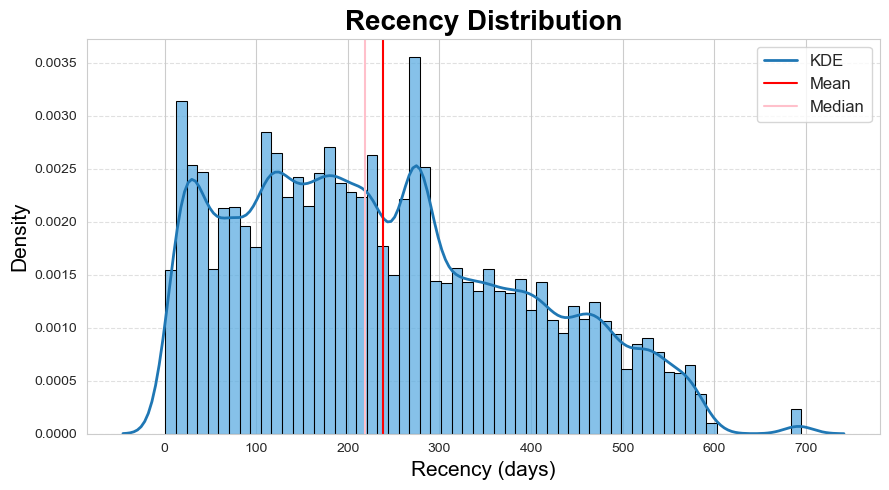

Mean of recency: 237.94496995147244
Median of recency: 219.0
Skewness of recency: 0.447225174560516


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Stil
sns.set_style('whitegrid')

plt.figure(figsize=(9, 5))

sns.histplot(rfm.Recency, stat='density', color='#5DADE2', edgecolor='black', bins=60)

sns.kdeplot(rfm.Recency, color='#1f77b4', linewidth=2, label='KDE')

plt.axvline(rfm.Recency.mean(), color='red', linestyle='-', linewidth=1.5, label='Mean')
plt.axvline(rfm.Recency.median(), color='pink', linestyle='-', linewidth=1.5, label='Median')

plt.title('Recency Distribution', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Recency (days)', fontsize=15, color='black')
plt.ylabel('Density', fontsize=15, color='black')


plt.legend(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Sayısal bilgil
print('Mean of recency:', rfm.Recency.mean())
print('Median of recency:', rfm.Recency.median())
print('Skewness of recency:', rfm.Recency.skew())

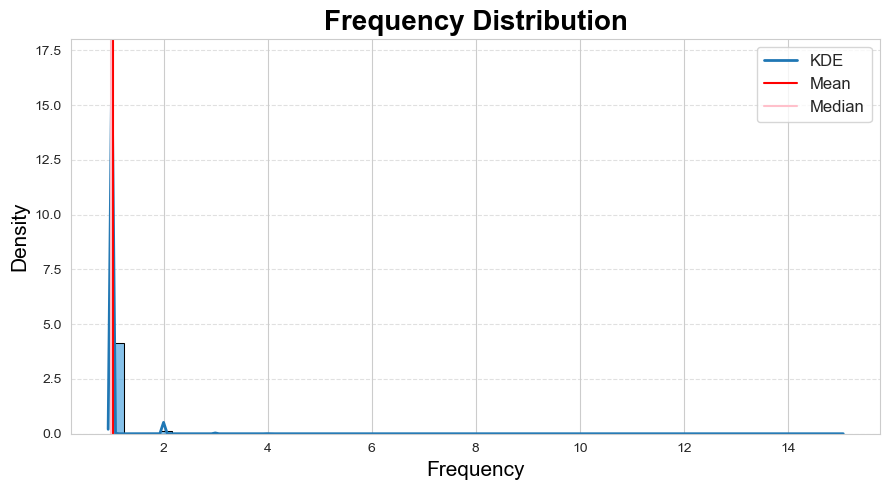

Mean of frequency: 1.0334229611458077
Median of frequency: 1.0
Skewness of frequency: 11.094616649746156


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Stil
sns.set_style('whitegrid')

plt.figure(figsize=(9, 5))

sns.histplot(rfm.Frequency, stat='density', color='#5DADE2', edgecolor='black', bins=60)

sns.kdeplot(rfm.Frequency, color='#1f77b4', linewidth=2, label='KDE')

plt.axvline(rfm.Frequency.mean(), color='red', linestyle='-', linewidth=1.5, label='Mean')
plt.axvline(rfm.Frequency.median(), color='pink', linestyle='-', linewidth=1.5, label='Median')

plt.title('Frequency Distribution', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Frequency', fontsize=15, color='black')
plt.ylabel('Density', fontsize=15, color='black')


plt.legend(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Sayısal bilgil
print('Mean of frequency:', rfm.Frequency.mean())
print('Median of frequency:', rfm.Frequency.median())
print('Skewness of frequency:', rfm.Frequency.skew())

In [38]:
Q1 = np.quantile(rfm.Frequency, 0.25)
Q3 = np.quantile(rfm.Frequency, 0.75)
IQR = Q3 - Q1
frequencyDistribution = rfm[~((rfm.Frequency < Q1 - 1.5 * IQR) | (rfm.Frequency > Q3 + 1.5 * IQR))]
frequencyDistribution.head()

customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      112          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     27.19
2  0000f46a3911fa3c0805444483337064      537          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89

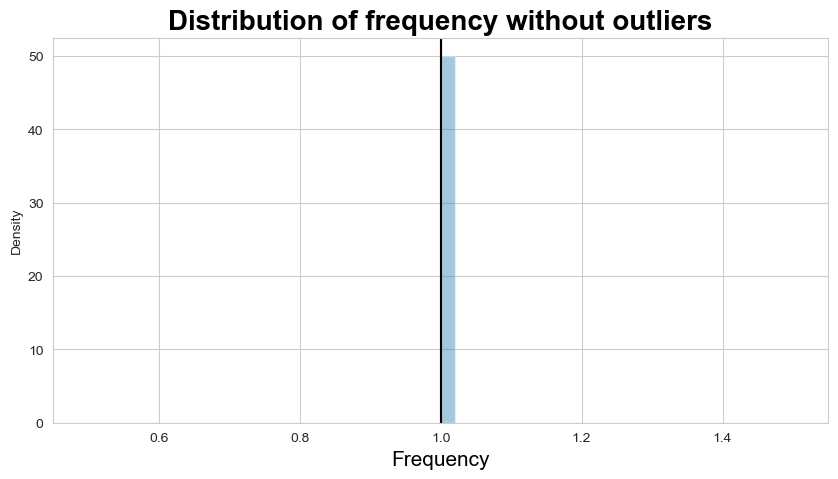

In [39]:
plt.figure(figsize=(10, 5))
sns.distplot(frequencyDistribution.Frequency)
plt.axvline(frequencyDistribution.Frequency.mean(), c = 'red')
plt.axvline(frequencyDistribution.Frequency.median(), c = 'black')
plt.xlabel('Frequency',color='black',fontsize=15)
plt.title('Distribution of frequency without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [40]:
frequencyDistribution.Frequency.describe()

count    90548.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Frequency, dtype: float64

In [41]:
# Observations:

# The frequency from RFM analysis without outliers has a standard deviation of 0, that is, all the values are only 1.
# So the frequency will not help in our analysis and also to segment the customers.

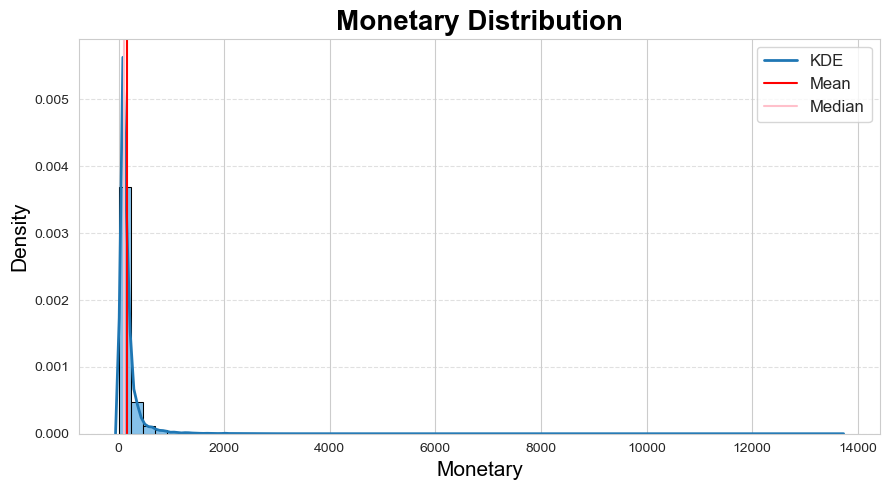

Mean of monetary: 165.19815798776634
Median of monetary: 107.78
Skewness of monetary: 9.210753696620666


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Stil
sns.set_style('whitegrid')

plt.figure(figsize=(9, 5))

sns.histplot(rfm.Monetary, stat='density', color='#5DADE2', edgecolor='black', bins=60)

sns.kdeplot(rfm.Monetary, color='#1f77b4', linewidth=2, label='KDE')

plt.axvline(rfm.Monetary.mean(), color='red', linestyle='-', linewidth=1.5, label='Mean')
plt.axvline(rfm.Monetary.median(), color='pink', linestyle='-', linewidth=1.5, label='Median')

plt.title('Monetary Distribution', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Monetary', fontsize=15, color='black')
plt.ylabel('Density', fontsize=15, color='black')


plt.legend(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Sayısal bilgil
print('Mean of monetary:', rfm.Monetary.mean())
print('Median of monetary:', rfm.Monetary.median())
print('Skewness of monetary:', rfm.Monetary.skew())

In [43]:
Q1 = np.quantile(rfm.Monetary, 0.25)
Q3 = np.quantile(rfm.Monetary, 0.75)
IQR = Q3 - Q1
monetaryDistribution = rfm[~((rfm.Monetary < Q1 - 1.5 * IQR) | (rfm.Monetary > Q3 + 1.5 * IQR))]
monetaryDistribution.head()

customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      112          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     27.19
2  0000f46a3911fa3c0805444483337064      537          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89

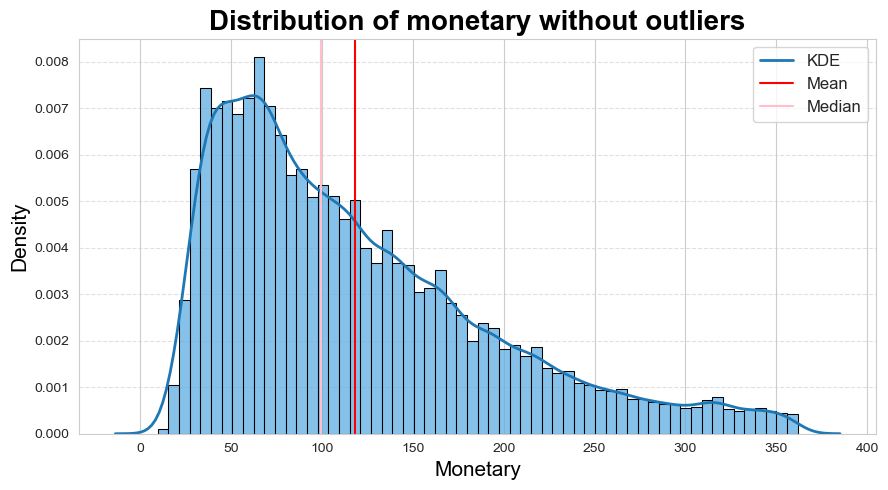

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Stil
sns.set_style('whitegrid')

plt.figure(figsize=(9, 5))

sns.histplot(monetaryDistribution.Monetary, stat='density', color='#5DADE2', edgecolor='black', bins=60)

sns.kdeplot(monetaryDistribution.Monetary, color='#1f77b4', linewidth=2, label='KDE')

plt.axvline(monetaryDistribution.Monetary.mean(), color='red', linestyle='-', linewidth=1.5, label='Mean')
plt.axvline(monetaryDistribution.Monetary.median(), color='pink', linestyle='-', linewidth=1.5, label='Median')

plt.title('Distribution of monetary without outliers', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Monetary', fontsize=15, color='black')
plt.ylabel('Density', fontsize=15, color='black')


plt.legend(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [45]:
monetaryDistribution.Monetary.describe()

count    85947.000000
mean       118.400502
std         75.238717
min          9.590000
25%         60.000000
50%         99.520000
75%        159.680000
max        361.760000
Name: Monetary, dtype: float64

In [46]:
rfm['Frequency'].value_counts()

Frequency
1     90548
2      2573
3       181
4        28
5         9
6         5
7         3
9         1
15        1
Name: count, dtype: int64

In [47]:
# RFM tablosuna her müşteri için yeni müşteri olup olmadığını gösteren bir kolon ekle (1 = yeni müşteri, 0 = değil)
# rfm["new_customer"] = rfm.apply(
#     lambda row: 1 if (row["first_purchase_date"] >= (reference_date - pd.DateOffset(days=60))) 
#                  and (row["Frequency"] == 1 )  else 0, axis=1  )

In [48]:
#5 li deneme YENI EKLEDIM
quantiles = rfm.select_dtypes(include=['number']).quantile(q=[0.2, 0.4, 0.6, 0.8])
def RScore(x, p, d):
    if p == 'Recency':
        if x <= d[p][0.2]:
            return 5
        elif x <= d[p][0.4]:
            return 4
        elif x <= d[p][0.6]:
            return 3
        elif x <= d[p][0.8]:
            return 2
        else:
            return 1
    else:
        if x <= d[p][0.2]:
            return 1
        elif x <= d[p][0.4]:
            return 2
        elif x <= d[p][0.6]:
            return 3
        elif x <= d[p][0.8]:
            return 4
        else:
            return 5
rfm['R']= rfm['Recency'].apply(RScore, args=('Recency', quantiles,))
rfm['F']= rfm['Frequency'].apply(RScore, args=('Frequency', quantiles,))
rfm['M']= rfm['Monetary'].apply(RScore, args=('Monetary', quantiles,))

In [49]:
# quantiles= rfm.select_dtypes(include=['number']).quantile(q=[0.25, 0.5, 0.75])
# quantiles
#quantile orders all numbers from least to large.

In [50]:
# quantiles= rfm.select_dtypes(include=['number']).quantile(q=[0.25, 0.5, 0.75])

# # Assign RFM scores
# def RScore(x, p, d):
#     if p== 'Recency':
#         if x<= d[p][0.25]:
#             return 4
#         elif x<= d[p][0.50]:
#             return 3
#         elif x<= d[p][0.75]:
#             return 2
#         else:
#             return 1
#     else:
#         if x<= d[p][0.25]:
#             return 1
#         elif x<= d[p][0.50]:
#             return 2
#         elif x<= d[p][0.75]:
#             return 3
#         else:
#             return 4


# rfm['R']= rfm['Recency'].apply(RScore, args=('Recency', quantiles,))
# rfm['F']= rfm['Frequency'].apply(RScore, args=('Frequency', quantiles,))
# rfm['M']= rfm['Monetary'].apply(RScore, args=('Monetary', quantiles,))
# rfm.head()

In [51]:
rfm['RFM_Rank'] = list(zip(rfm.R, rfm.M))
# rfm['RFM_Score']= rfm[['R','M']].sum(axis=1)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  R  F  M  \
0  0000366f3b9a7992bf8c76cfdf3221e2      112          1    141.90  4  1  4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     27.19  4  1  1   
2  0000f46a3911fa3c0805444483337064      537          1     86.22  1  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62  2  1  1   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89  2  1  4   

  RFM_Rank  
0   (4, 4)  
1   (4, 1)  
2   (1, 2)  
3   (2, 1)  
4   (2, 4)

In [52]:

rfm['RFM_Code'] = rfm['R'].astype(str) + rfm['M'].astype(str)

segment_map = {
    '55': 'Champions',
    '54': 'Champions',
    '53': 'Loyal Customers',
    '52': 'New Customers', 
    '51': 'New Customers',

    '45': 'Champions',
    '44': 'Loyal Customers',
    '43': 'Potential Loyalists',
    '42': 'Potential Loyalists',
    '41': 'New Customers',

    '35': 'Need Attention',
    '34': 'Need Attention',
    '33': 'About to Sleep',
    '32': 'About to Sleep',
    '31': 'Hibernating',

    '25': 'At Risk',
    '24': 'At Risk', 
    '23': 'Hibernating',
    '22': 'Hibernating',
    '21': 'Lost',

    '15': 'Lost VIPs',
    '14': 'Lost',
    '13': 'Lost',
    '12': 'Lost',
    '11': 'Lost'
}

rfm['RFM_Segments'] = rfm['RFM_Code'].map(segment_map)

In [53]:
rfm['RFM_Segments'].value_counts()
segment_counts = rfm['RFM_Segments'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segments', 'Counts']


segment_counts['RFM_Segments'] = pd.Categorical(
    segment_counts['RFM_Segments'],
    categories=[
        'Champions', 'Loyal Customers', 'Potential Loyalists',
        'New Customers', 'Need Attention', 'About to Sleep',
        'At Risk', 'Hibernating', 'Lost VIPs', 'Lost'
    ],
    ordered=True
)


display(
    segment_counts.sort_values('RFM_Segments').style.set_properties(**{'text-align': 'left'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'left')]}]
    )
)

In [54]:
# High Value: High-spending, and loyal customers. High Value segment includes Champions, Loyal Customers
# Mid Value: New, potential, or declining customers. Mid Value includes New Customers, Potential Loyalists, Need Attention, About to Sleep
# Low Value: Long inactive or completely churned customers. Low Value segment includes Hibernating, At Risk, Lost, Lost VIPs

segment_map3 = {
    '55': 'High Value',
    '54': 'High Value',
    '53': 'High Value',
    '52': 'Mid Value',
    '51': 'Mid Value',

    '45': 'High Value',
    '44': 'High Value',
    '43': 'Mid Value',
    '42': 'Mid Value',
    '41': 'Mid Value',

    '35': 'Mid Value',
    '34': 'Mid Value',
    '33': 'Mid Value',
    '32': 'Mid Value',
    '31': 'Low Value',

    '25': 'Low Value',
    '24': 'Low Value',
    '23': 'Low Value',
    '22': 'Low Value',
    '21': 'Low Value',

    '15': 'Low Value',
    '14': 'Low Value',
    '13': 'Low Value',
    '12': 'Low Value',
    '11': 'Low Value'
}

rfm['RFM_Segments_Trio'] = rfm['RFM_Code'].map(segment_map3)

In [55]:
# segment_labels= ['Low-Value','Mid-Value','High-Value']

# def assign_segment(score):
#         if score < 5:
#             return 'Low-Value'  #segment_labels[0]
#         elif score < 9:
#             return 'Mid-Value'  #segment_labels[1]
#         else:
#             return 'High-Value' #segment_labels[2]

# rfm['RFM_Segment_Label']= rfm['RFM_Score'].apply(assign_segment)

# rfm.head()

In [56]:
segment_counts3= rfm['RFM_Segments_Trio'].value_counts().reset_index()
segment_counts3.columns= ['RFM_Segments_Trio', 'Count']
segment_counts3

RFM_Segments_Trio  Count
0         Low Value  41118
1         Mid Value  33035
2        High Value  19196

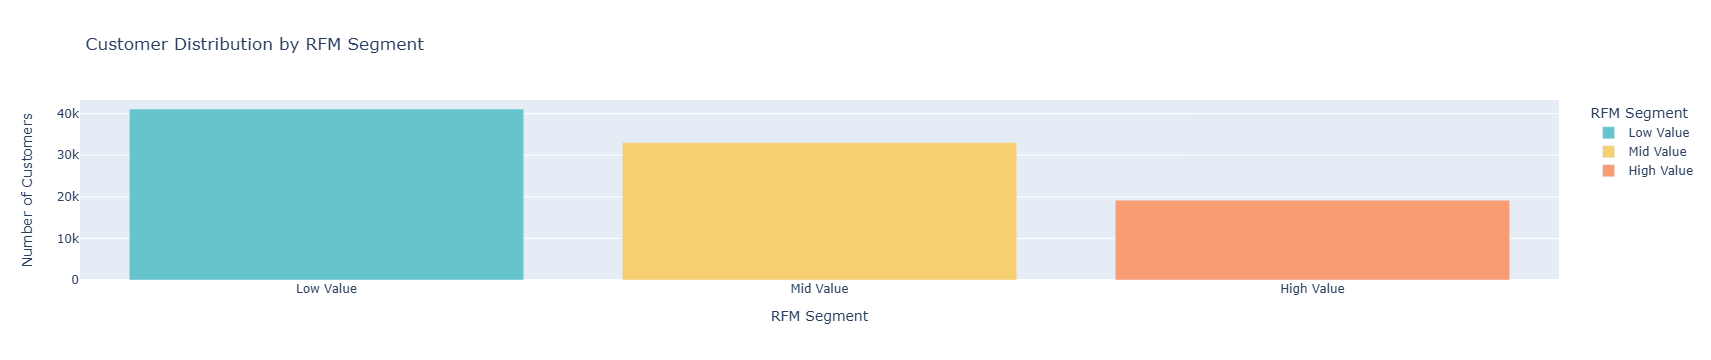

In [57]:
#Create the bar chart using Plotly
fig= px.bar(segment_counts3,
            x='RFM_Segments_Trio',
            y='Count',
            title='Customer Distribution by RFM Segment',
            labels={'RFM_Segments_Trio': 'RFM Segment', 'Count':'Number of Customers'},
            color='RFM_Segments_Trio',
            color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

In [58]:
# rfm['RFM_Customer_Segments'] = ''
#BU DA RFM in oldugu 4 lu gruba gore
# rfm.loc[rfm['RFM_Score'] >= 9, 'RFM_Customer_Segments'] = 'VIP/Loyal'
# rfm.loc[(rfm['RFM_Score'] >= 6) & (rfm['RFM_Score'] < 9), 'RFM_Customer_Segments'] = 'Potential Loyal'
# rfm.loc[(rfm['RFM_Score'] >= 5) & (rfm['RFM_Score'] < 6), 'RFM_Customer_Segments'] = 'At Risk Customers'
# rfm.loc[(rfm['RFM_Score'] >= 4) & (rfm['RFM_Score'] < 5), 'RFM_Customer_Segments'] = "Cant Lose"
# rfm.loc[(rfm['RFM_Score'] >= 3) & (rfm['RFM_Score'] < 4), 'RFM_Customer_Segments'] = 'Lost'

#BU SADECE RM OLAN 4 LU GRUBA GORE
# rfm.loc[rfm['RFM_Score'] >= 8, 'RFM_Customer_Segments'] = 'VIP/Loyal'
# rfm.loc[(rfm['RFM_Score'] >= 5) & (rfm['RFM_Score'] < 8), 'RFM_Customer_Segments'] = 'Potential Loyal'
# rfm.loc[(rfm['RFM_Score'] >= 4) & (rfm['RFM_Score'] < 5), 'RFM_Customer_Segments'] = 'At Risk Customers'
# rfm.loc[(rfm['RFM_Score'] >= 3) & (rfm['RFM_Score'] < 4), 'RFM_Customer_Segments'] = "Cant Lose"
# rfm.loc[rfm['RFM_Score'] < 3, 'RFM_Customer_Segments'] = 'Lost'

#YENI EKLEDIM 5 LIYE GORE BU
# rfm.loc[rfm['RFM_Score'] >= 9, 'RFM_Customer_Segments'] = 'VIP/Loyal'
# rfm.loc[(rfm['RFM_Score'] >= 7) & (rfm['RFM_Score'] < 9), 'RFM_Customer_Segments'] = 'Potential Loyal'
# rfm.loc[(rfm['RFM_Score'] >= 5) & (rfm['RFM_Score'] < 7), 'RFM_Customer_Segments'] = 'At Risk Customers'
# rfm.loc[(rfm['RFM_Score'] >= 3) & (rfm['RFM_Score'] < 5), 'RFM_Customer_Segments'] = "Cant Lose"
# rfm.loc[rfm['RFM_Score'] < 3, 'RFM_Customer_Segments'] = 'Lost'


# **Yeni müşteri olanları ayrı olarak işaretle**
# rfm.loc[rfm['new_customers'] == 1, 'RFM_Customer_Segments'] = 'New Customers' BUNDAN EMIN DEGILIM EKLESEM MI

# segment_counts=rfm['RFM_Customer_Segments'].value_counts().sort_index()
# segment_counts

In [59]:
# rfm['RFM_Score'].describe()

In [60]:
# rfm['RFM_Score'].value_counts().sort_index()

In [61]:
# segment_products_counts=rfm.groupby(['RFM_Segment_Label','RFM_Customer_Segments']).size().reset_index(name='Count')
# segment_products_counts=segment_products_counts.sort_values('Count', ascending=False)
# segment_products_counts

In [62]:
segment_products_countsx=rfm.groupby(['RFM_Segments_Trio','RFM_Segments']).size().reset_index(name='Count')
segment_products_countsx=segment_products_countsx.sort_values('Count', ascending=False)
segment_products_countsx

RFM_Segments_Trio         RFM_Segments  Count
4         Low Value                 Lost  18474
3         Low Value          Hibernating  11559
0        High Value            Champions  11528
8         Mid Value        New Customers  10874
1        High Value      Loyal Customers   7668
7         Mid Value       Need Attention   7419
6         Mid Value       About to Sleep   7385
2         Low Value              At Risk   7374
9         Mid Value  Potential Loyalists   7357
5         Low Value            Lost VIPs   3711

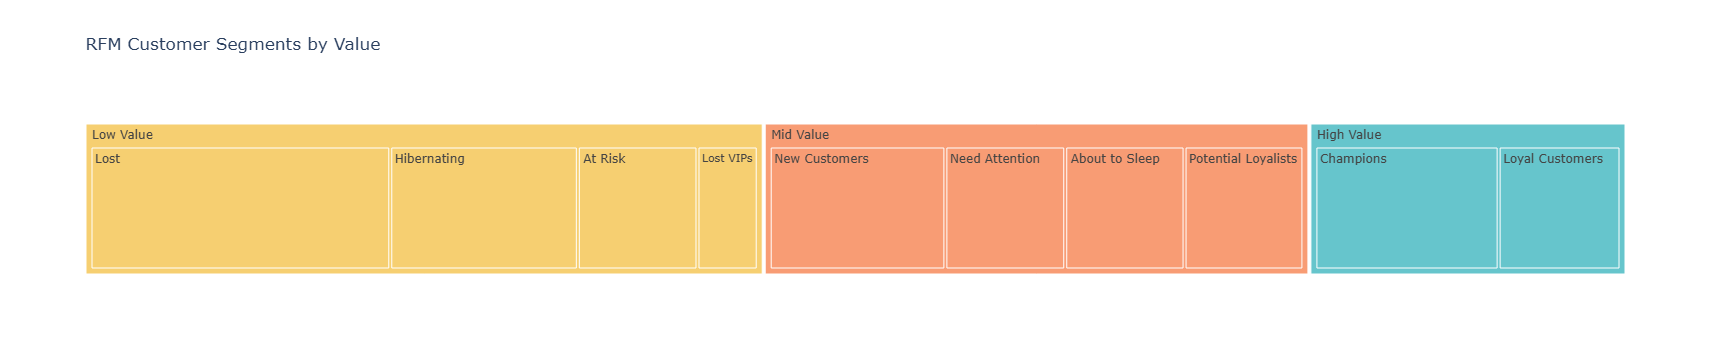

In [63]:
# #Create the treemap
fig_treemap_segment_product=px.treemap(segment_products_countsx,
                                       path=['RFM_Segments_Trio','RFM_Segments'],
                                       values='Count',
                                       color='RFM_Segments_Trio',
                                       color_discrete_sequence=px.colors.qualitative.Pastel,
                                       title='RFM Customer Segments by Value')

# fig_treemap_segment_product.update_layout(
#     title={
#         'text': 'RFM Customer Segments by Value',
#         'y': 0.75,  # 1.0 en üst, 0.5 ortalar, 0.0 en alt
#         'x': 0.13,   # ortalamak için
#         'xanchor': 'left'
#         # 'yanchor': 'top'
#     }
# )
# Display the treemap
fig_treemap_segment_product.show()


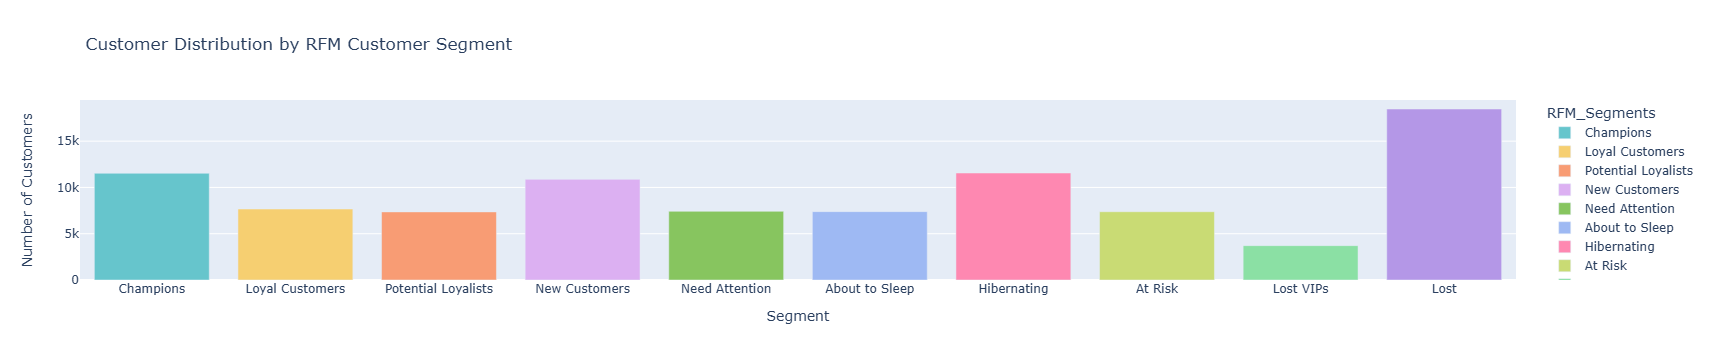

In [64]:
import plotly.express as px

# Segmentlerin sayısını bul
segment_counts = rfm['RFM_Segments'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segments', 'Count']

# Sıralama istiyorsan:
segment_order = [
    'Champions', 'Loyal Customers', 'Potential Loyalists',
    'New Customers', 'Need Attention', 'About to Sleep',
    'Hibernating', 'At Risk', 'Lost VIPs', 'Lost'
]

fig_bar = px.bar(
    segment_counts,
    x='RFM_Segments',
    y='Count',
    title='Customer Distribution by RFM Customer Segment',
    color='RFM_Segments',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    category_orders={'RFM_Segments': segment_order}
)

fig_bar.update_layout(xaxis_title='Segment', yaxis_title='Number of Customers')
fig_bar.show()



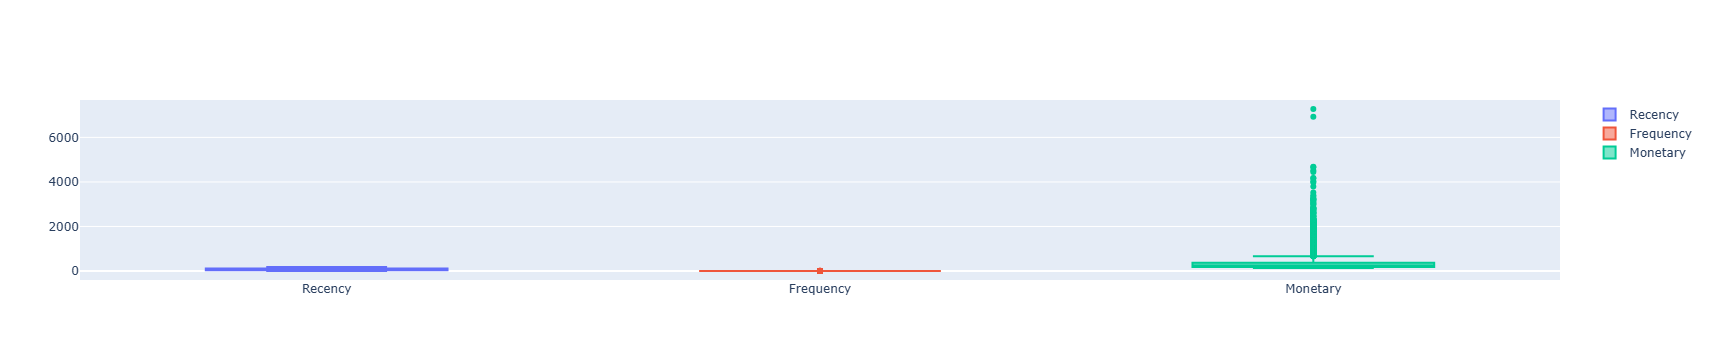

In [65]:
vip_segment= rfm[rfm['RFM_Segments'] == 'Champions' ]

fig= go.Figure()
fig.add_trace(go.Box(y=vip_segment['Recency'], name='Recency'))
fig.add_trace(go.Box(y=vip_segment['Frequency'], name='Frequency'))
fig.add_trace(go.Box(y=vip_segment['Monetary'], name='Monetary'))

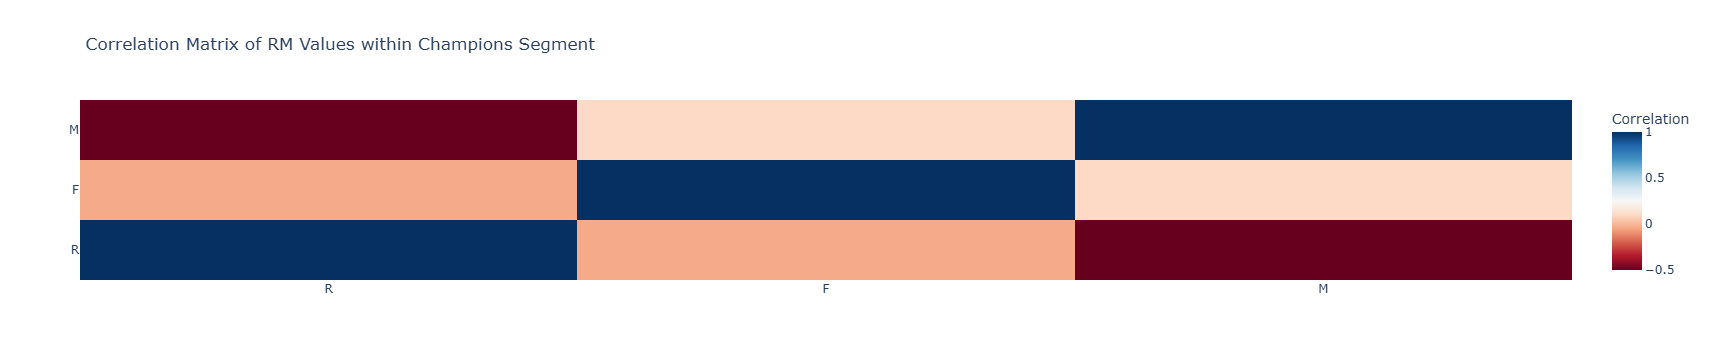

In [66]:
correlation_matrix= vip_segment[['R','F','M']].corr() 

fig_heatmap = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    colorbar=dict(title='Correlation')
))

fig_heatmap.update_layout(title='Correlation Matrix of RM Values within Champions Segment')

# Display the heatmap
fig_heatmap.show()

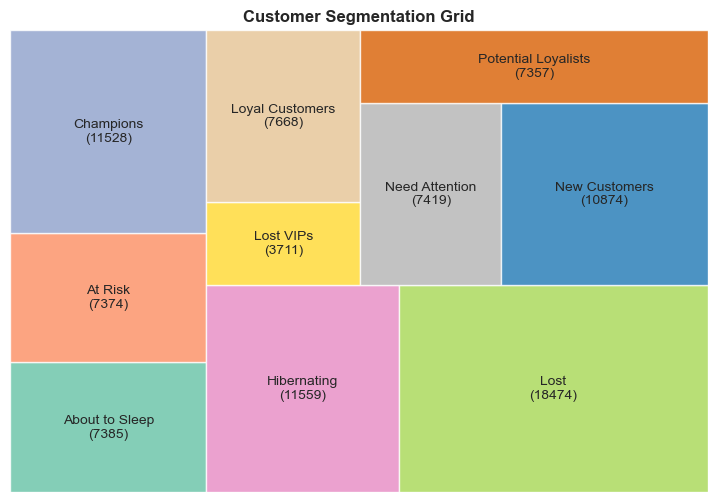

In [67]:
# import squarify
# import matplotlib.pyplot as plt

# plt.figure(figsize=[9,6])
# plt.rc('font', size=8)
# plt.grid(False)
# Sizes = rfm.groupby('RFM_Customer_Codes')[['Monetary']].count()
# squarify.plot(sizes= Sizes.values, label= Sizes.index, color=["red", "orange", "blue", "yellow", "fuchsia", "green", "royalblue", "lightgreen", "skyblue", "violet"], alpha=.55)
# plt.suptitle("Customer Segmentation Grid", fontsize=10);

import squarify
import matplotlib.pyplot as plt

plt.figure(figsize=[9,6])
plt.rc('font', size=9)
plt.grid(False)
Sizes = rfm.groupby('RFM_Segments')['Monetary'].count()

labels = [f'{label}\n({value.item()})' for label, value in zip(Sizes.index, Sizes.values)]

squarify.plot(
    sizes=Sizes.values,
    label=labels,
    color=[  "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854",
    "#ffd92f", "#e5c494", "#b3b3b3", "#1f78b4", "#d95f02"],
    alpha=.8,
    text_kwargs={'fontsize': 10}
)

plt.axis('off')
plt.title("Customer Segmentation Grid", fontsize=12, fontweight='bold')
plt.show()


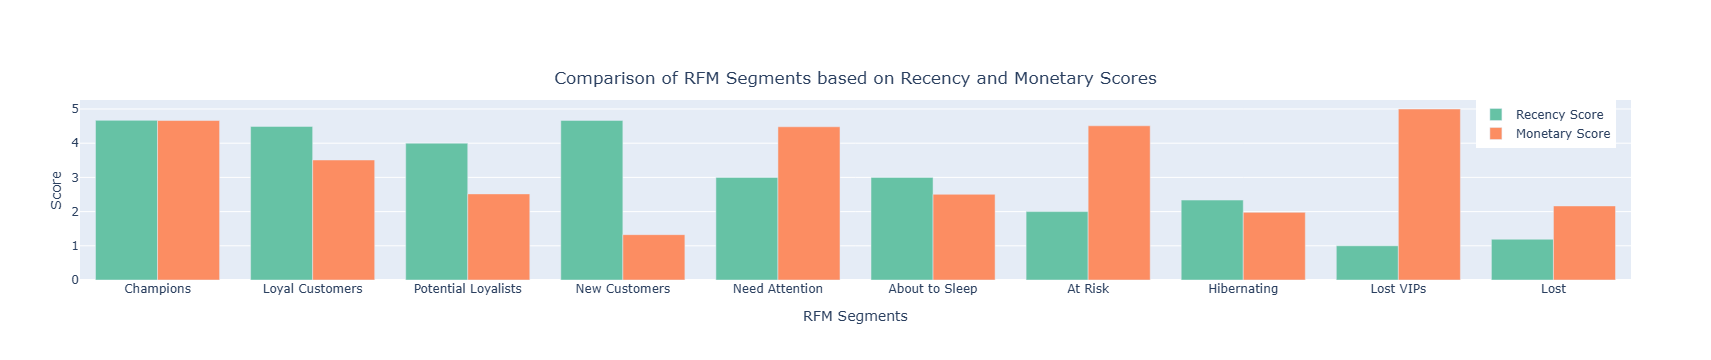

In [68]:
segment_scores = rfm.groupby('RFM_Segments')[['R', 'M']].mean().reset_index()
orderx = ['Champions', 'Loyal Customers', 'Potential Loyalists', 'New Customers',
                 'Need Attention', 'About to Sleep', 'At Risk', 'Hibernating', 'Lost VIPs', 'Lost']

segment_scores['RFM_Segments'] = pd.Categorical(segment_scores['RFM_Segments'], categories=orderx, ordered=True)
segment_scores = segment_scores.sort_values('RFM_Segments')

fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM_Segments'],
    y=segment_scores['R'],
    name='Recency Score',
    # marker_color='rgb(158,202,225)'
    marker_color='#66c2a5' 
))

# Add bars for Frequency score
# fig.add_trace(go.Bar(
#     x=segment_scores['RFM_Customer_Segments'],
#     y=segment_scores['F'],
#     name='Frequency Score',
#     marker_color='rgb(94,158,217)'
# ))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM_Segments'],
    y=segment_scores['M'],
    name='Monetary Score',
    # marker_color='rgb(32,102,148)'
     marker_color='#fc8d62'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

fig.update_layout(
    yaxis=dict(
        title='Score',
        title_standoff=1  
    ),
    title=dict(
        text='Comparison of RFM Segments based on Recency and Monetary Scores',
        x=0.5,
        y=0.8,
        xanchor='center',
        yanchor='top'
    ),
    legend=dict(
        x=0.9,
        y=1
    )
)

fig.show()

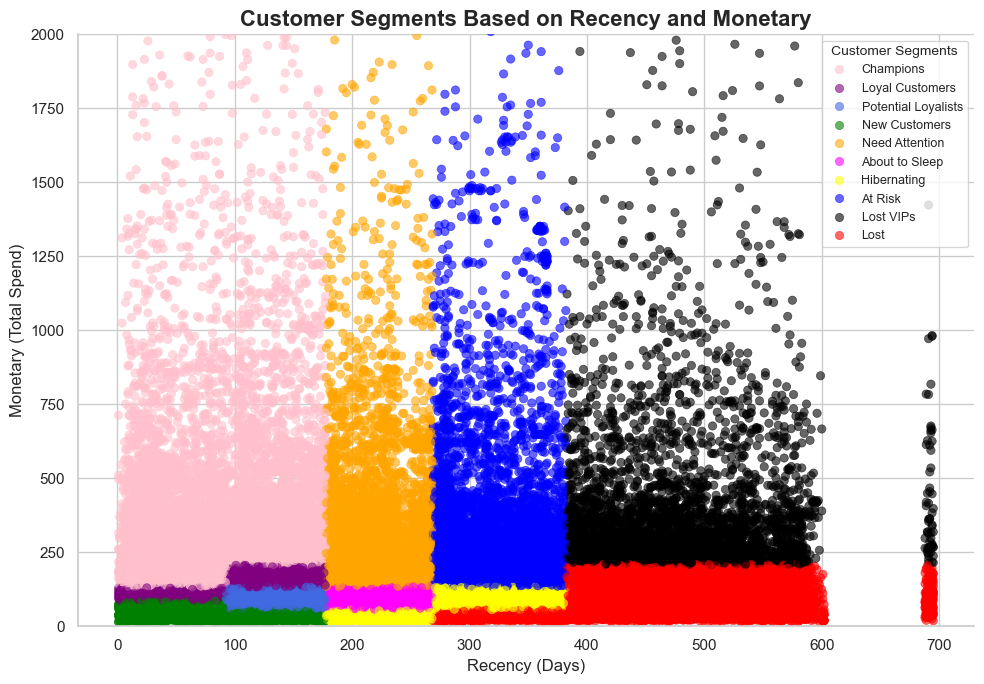

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Belirli sıralama
segment_order = [
    'Champions',
    'Loyal Customers',
    'Potential Loyalists',
    'New Customers',
    'Need Attention',
    'About to Sleep',
    'Hibernating',
    'At Risk',
    'Lost VIPs',
    'Lost'
]

# Segment-renk eşlemesi
segment_palette = {
    'Champions': 'pink',
    'Loyal Customers': 'purple',
    'Potential Loyalists': 'royalblue',
    'New Customers': 'green',
    'Need Attention': 'orange',
    'About to Sleep': 'fuchsia',
    'Hibernating': 'yellow',
    'At Risk': 'blue',
    'Lost VIPs': 'black',
    'Lost': 'red'
}

plt.figure(figsize=[10, 7])
sns.set(style='whitegrid')

# Grafik
sns.scatterplot(
    data=rfm,
    x='Recency',
    y='Monetary',
    hue='RFM_Segments',
    hue_order=segment_order,           
    palette=segment_palette,
    alpha=0.6,
    edgecolor=None
)

# Ayarlar
plt.ylim(0, 2000)
plt.title("Customer Segments Based on Recency and Monetary", fontsize=16, fontweight='bold')
plt.xlabel("Recency (Days)", fontsize=12)
plt.ylabel("Monetary (Total Spend)", fontsize=12)
plt.legend(title="Customer Segments", loc='upper right', frameon=True, fontsize=9, title_fontsize=10)
sns.despine()
plt.tight_layout()

# Word için çıktı (isteğe bağlı)
# plt.savefig("customer_segments_scatter.png", dpi=300, bbox_inches='tight')

plt.show()



In [70]:
#1. yol
# recency_threshold = rfm['Recency'].quantile(0.75)  # Recency değeri en yüksek %25'lik kısım
# monetary_threshold = rfm['Monetary'].quantile(0.25)  # Monetary değeri en düşük %25'lik kısım
# rfm['churn_state'] = rfm.apply(
#     lambda row: 1 if row['Recency'] > recency_threshold and row['Monetary'] < monetary_threshold else 0,
#     axis=1
# )

#2. yol
# recency_q3 = rfm['Recency'].quantile(0.75)
# rfm['churn_state'] = rfm['Recency'].apply(
#     lambda x: 1 if x > recency_q3 else 0
# )

# 3. yol
# recency_median = rfm['Recency'].median()
# monetary_median = rfm['Monetary'].median()
# rfm['churn_state'] = rfm.apply(
#     lambda row: 1 if row['Recency'] > recency_median and row['Monetary'] < monetary_median else 0,
#     axis=1
# )
# rfm['churn_state'] = rfm['Recency'].apply(
#     lambda x: 1 if x > recency_median else 0
# )

#4. yol
# # Recency ve Monetary için yüzdelik dilimler
# recency_75 = rfm['Recency'].quantile(0.75)   # en yüksek %25 (geç alışveriş yapanlar)
# monetary_25 = rfm['Monetary'].quantile(0.25) # en düşük %25 (az harcayanlar)

# # Segment, Recency ve Monetary yüzdeliklerine göre churn_state
# def define_churn(row):
#     segment = row['RFM_Segments']
#     recency = row['Recency']
#     monetary = row['Monetary']

#     if segment in ['Lost', 'Lost VIPs'] and recency > recency_75:
#         return 1
#     elif segment in ['At Risk', 'Hibernating'] and recency > recency_75 and monetary < monetary_25:
#         return 1
#     else:
#         return 0

# rfm['churn_state'] = rfm.apply(define_churn, axis=1)

rfm['churn_state'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)
rfm['churn_state'].value_counts(normalize=True) * 100
# rfm.head()

churn_state
0    54.64547
1    45.35453
Name: proportion, dtype: float64

In [71]:
# The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity.
# We used the recency column to frame the target variable. 
# If the customer's recency falls above the average value of recency, we consider such customers as churned. The rest of the customers as not churned.
# We used the mean of recency as the threshold as the recency is normally or symmetrically distributed.
# We will have to impute the target variable to the main dataframe and do the further classification algorithm.

In [72]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93349 entries, 0 to 93348
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  93349 non-null  object 
 1   Recency             93349 non-null  int64  
 2   Frequency           93349 non-null  int64  
 3   Monetary            93349 non-null  float64
 4   R                   93349 non-null  int64  
 5   F                   93349 non-null  int64  
 6   M                   93349 non-null  int64  
 7   RFM_Rank            93349 non-null  object 
 8   RFM_Code            93349 non-null  object 
 9   RFM_Segments        93349 non-null  object 
 10  RFM_Segments_Trio   93349 non-null  object 
 11  churn_state         93349 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 8.5+ MB


In [73]:
rfm.isnull().sum()

customer_unique_id    0
Recency               0
Frequency             0
Monetary              0
R                     0
F                     0
M                     0
RFM_Rank              0
RFM_Code              0
RFM_Segments          0
RFM_Segments_Trio     0
churn_state           0
dtype: int64

In [74]:
groupedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92070 entries, 0 to 92069
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_unique_id    92070 non-null  object 
 1   order_id              92070 non-null  int64  
 2   delivery_duration     92070 non-null  float64
 3   product_id            92070 non-null  int64  
 4   price                 92070 non-null  float64
 5   freight_value         92070 non-null  float64
 6   product_weight_g      92070 non-null  float64
 7   product_length_cm     92070 non-null  float64
 8   product_height_cm     92070 non-null  float64
 9   product_width_cm      92070 non-null  float64
 10  payment_type          92070 non-null  object 
 11  payment_installments  92070 non-null  int64  
 12  payment_value         92070 non-null  float64
 13  review_score          91473 non-null  float64
dtypes: float64(9), int64(3), object(2)
memory usage: 9.8+ MB


In [75]:
groupedData = groupedData.merge(rfm[['customer_unique_id', 'Recency','Frequency',
                                     'Monetary',
                                     'churn_state','R','F','M','RFM_Segments_Trio',"RFM_Segments"]], on = 'customer_unique_id')
groupedData.head()

customer_unique_id  order_id  delivery_duration  product_id  \
0  0000366f3b9a7992bf8c76cfdf3221e2         1                6.0           1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f         1                3.0           1   
2  0000f46a3911fa3c0805444483337064         1               25.0           1   
3  0000f6ccb0745a6a4b88665a16c9f078         1               20.0           1   
4  0004aac84e0df4da2b147fca70cf8255         1               13.0           1   

    price  freight_value  product_weight_g  product_length_cm  \
0  129.90          12.00            1500.0               34.0   
1   18.90           8.29             375.0               26.0   
2   69.00          17.22            1500.0               25.0   
3   25.99          17.63             150.0               19.0   
4  180.00          16.89            6050.0               16.0   

   product_height_cm  product_width_cm payment_type  payment_installments  \
0                7.0              32.0  credit_card                     8   
1               11.0              18.0  credit_card                     1   
2               50.0              35.0  credit_card                     8   
3                5.0              11.0  credit_card                     4   
4                3.0              11.0  credit_card                     6   

   payment_value  review_score  Recency  Frequency  Monetary  churn_state  R  \
0         141.90           5.0      112          1    141.90            0  4   
1          27.19           4.0      115          1     27.19            0  4   
2          86.22           3.0      537          1     86.22            1  1   
3          43.62           4.0      321          1     43.62            1  2   
4         196.89           5.0      288          1    196.89            1  2   

   F  M RFM_Segments_Trio     RFM_Segments  
0  1  4        High Value  Loyal Customers  
1  1  1         Mid Value    New Customers  
2  1  2         Low Value             Lost  
3  1  1         Low Value             Lost  
4  1  4         Low Value          At Risk

Skewness of order_id: 10.568401048766178
Standard deviation of order_id: 0.20689583610986248


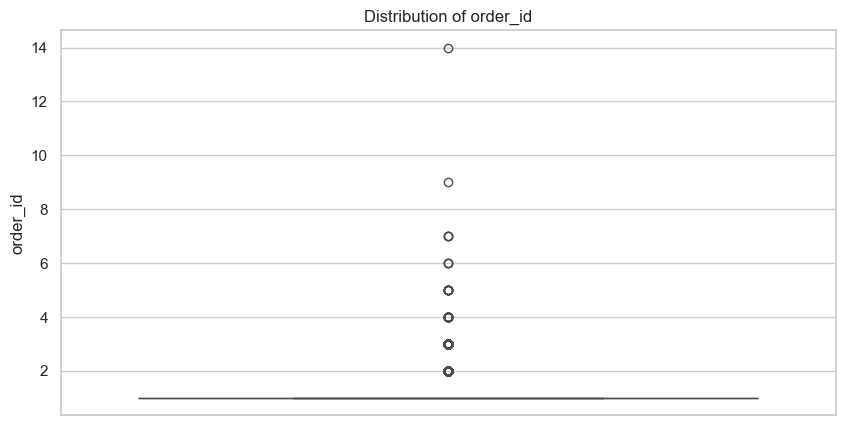

Skewness of delivery_duration: 3.878281741823554
Standard deviation of delivery_duration: 9.54747109051643


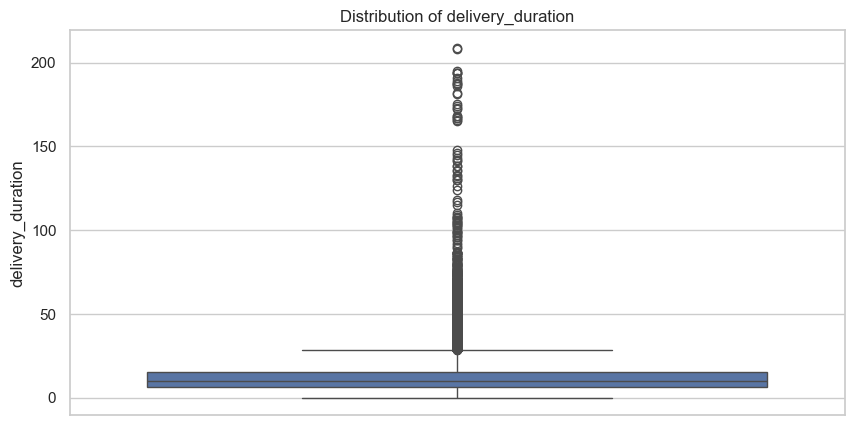

Skewness of product_id: 7.358850733683623
Standard deviation of product_id: 0.3147414454836501


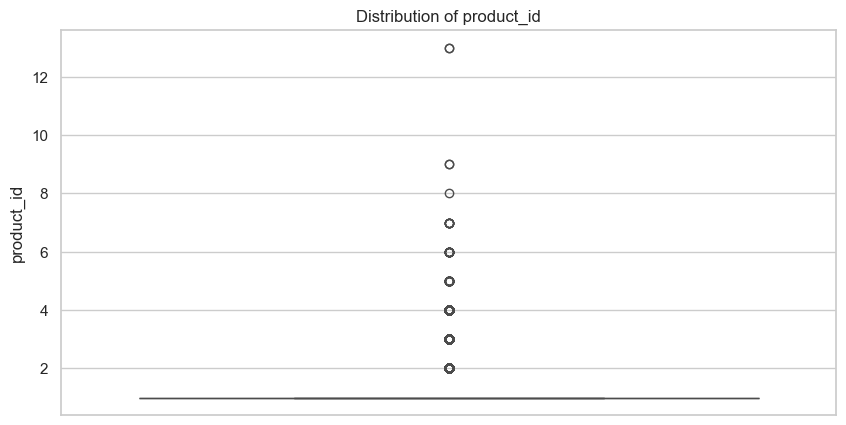

Skewness of price: 11.618346774891286
Standard deviation of price: 245.16362542898483


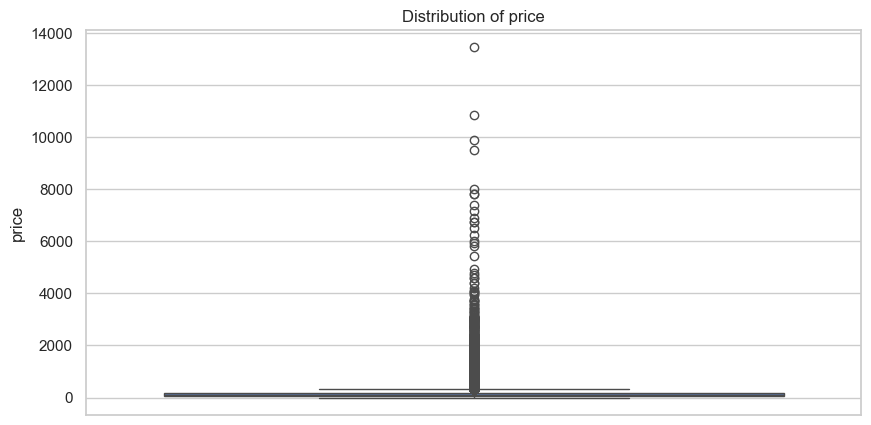

Skewness of freight_value: 13.296241637684735
Standard deviation of freight_value: 27.12352750286376


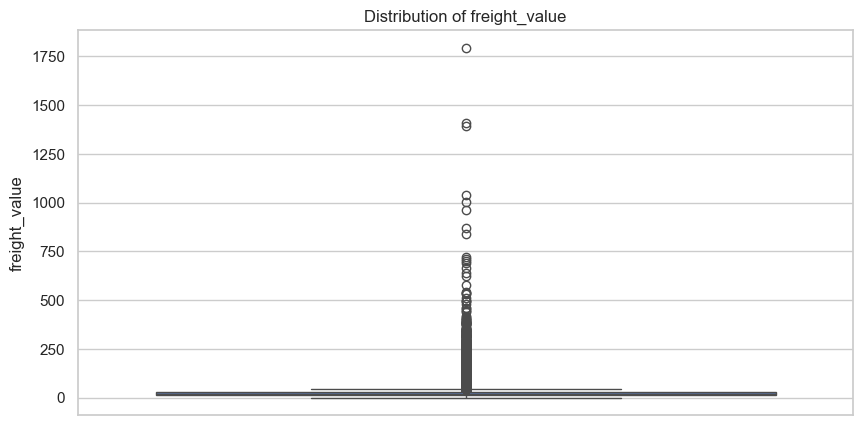

Skewness of product_weight_g: 12.08594516508892
Standard deviation of product_weight_g: 5845.455742122976


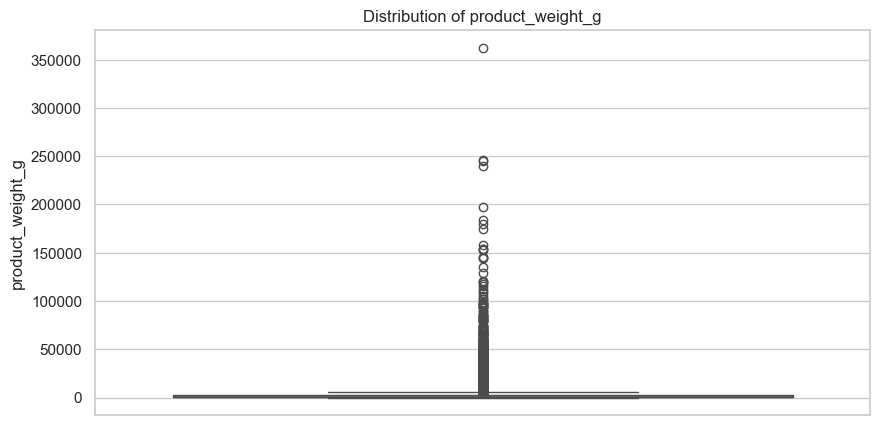

Skewness of product_length_cm: 15.358566111305036
Standard deviation of product_length_cm: 36.20280510175979


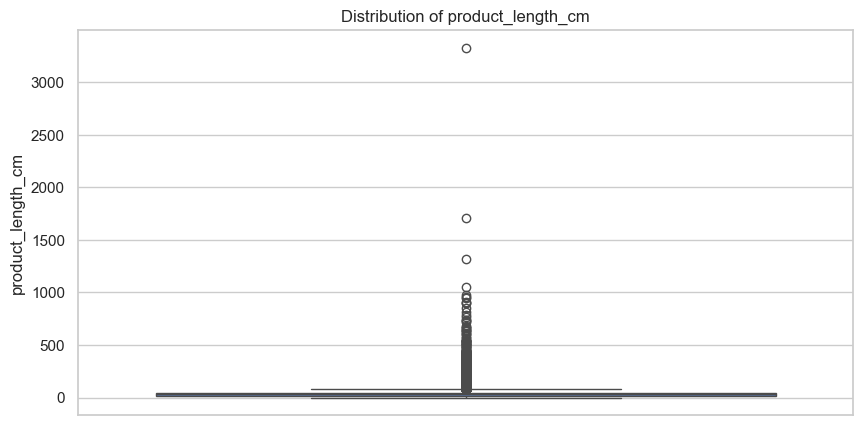

Skewness of product_height_cm: 14.23788468707938
Standard deviation of product_height_cm: 25.481569594321538


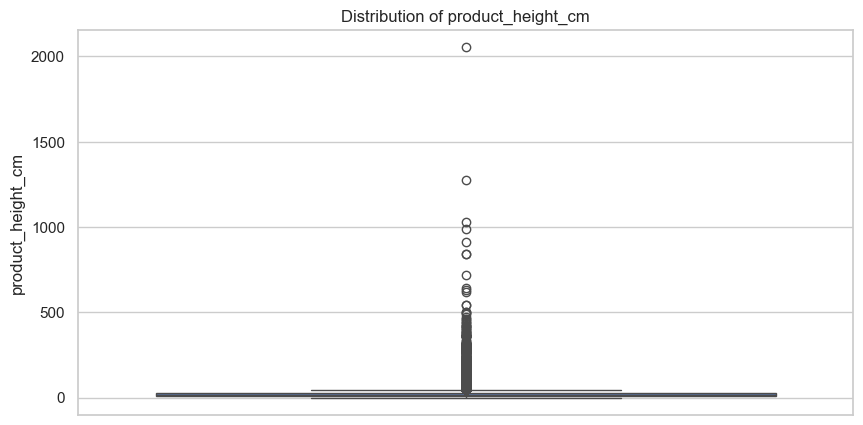

Skewness of product_width_cm: 15.872837396371441
Standard deviation of product_width_cm: 26.873093037900173


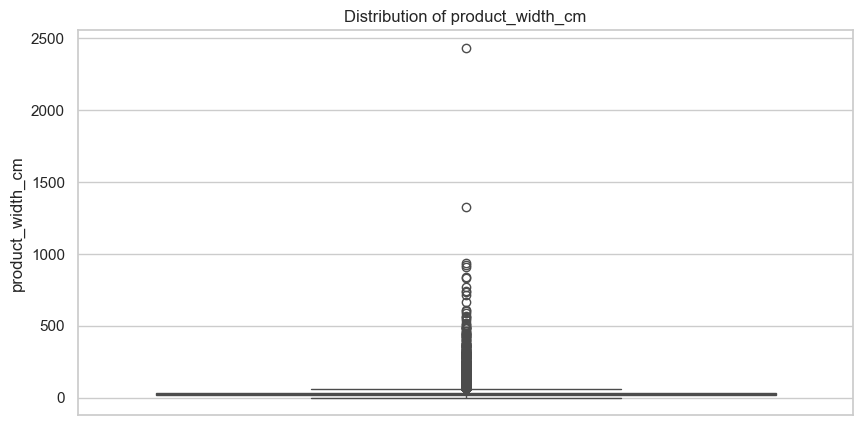

Skewness of payment_installments: 1.597452397049132
Standard deviation of payment_installments: 2.726135491789691


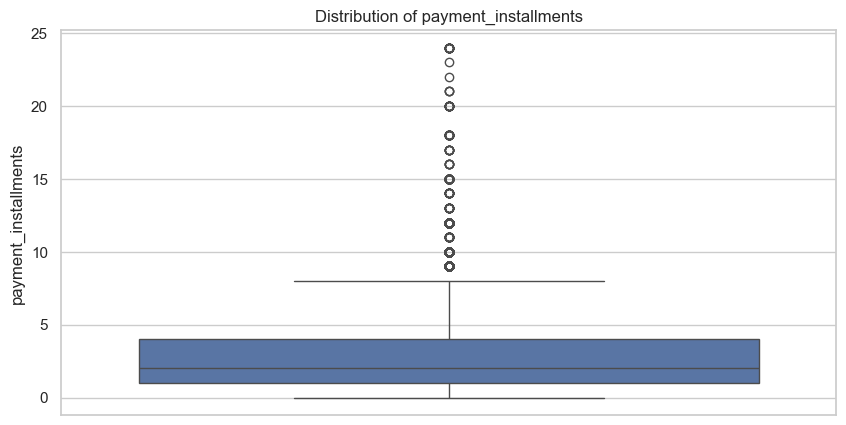

Skewness of payment_value: 69.55110608371365
Standard deviation of payment_value: 647.7656536387459


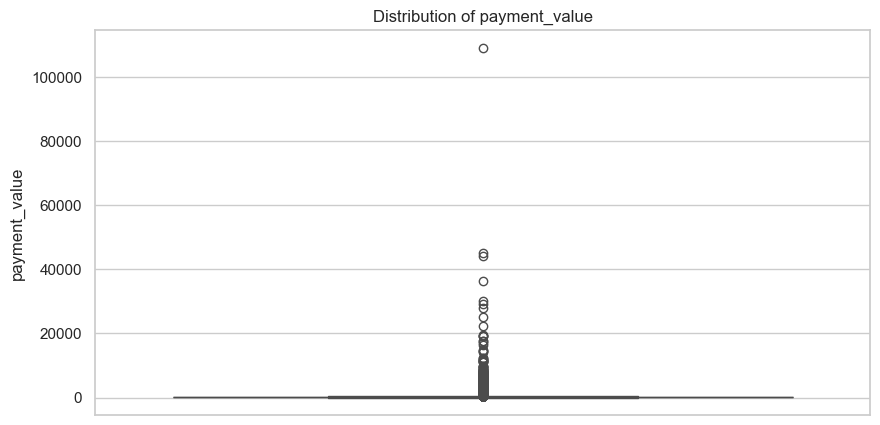

Skewness of review_score: -1.4794834642148231
Standard deviation of review_score: 1.2791498578289069


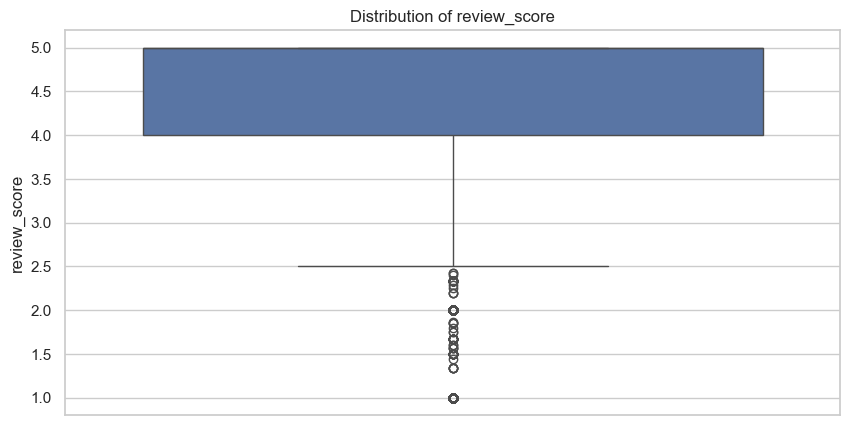

Skewness of Recency: 0.45097380688621097
Standard deviation of Recency: 152.56499852563843


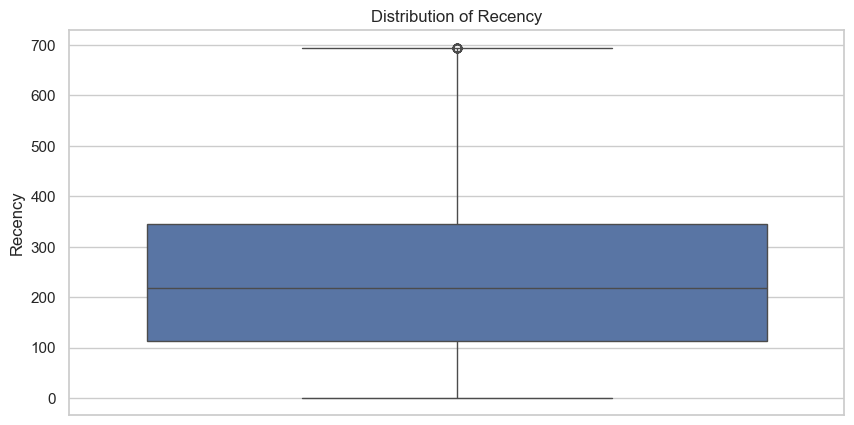

Skewness of Frequency: 11.0320822139731
Standard deviation of Frequency: 0.21039703497110238


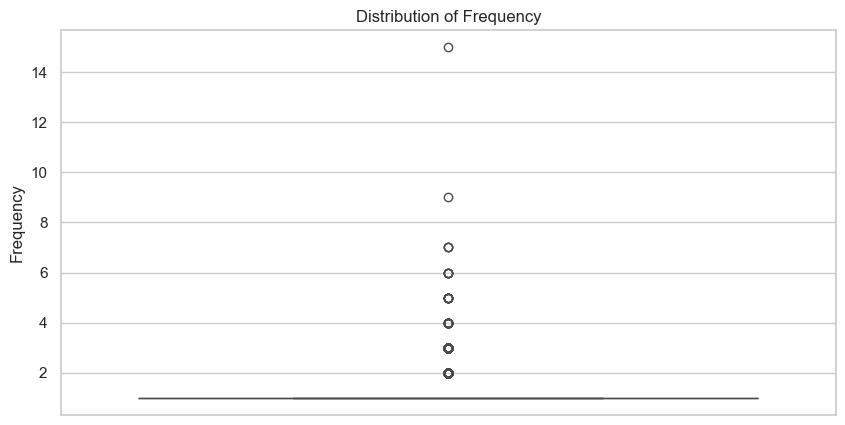

Skewness of Monetary: 9.221702738406247
Standard deviation of Monetary: 226.31583067648748


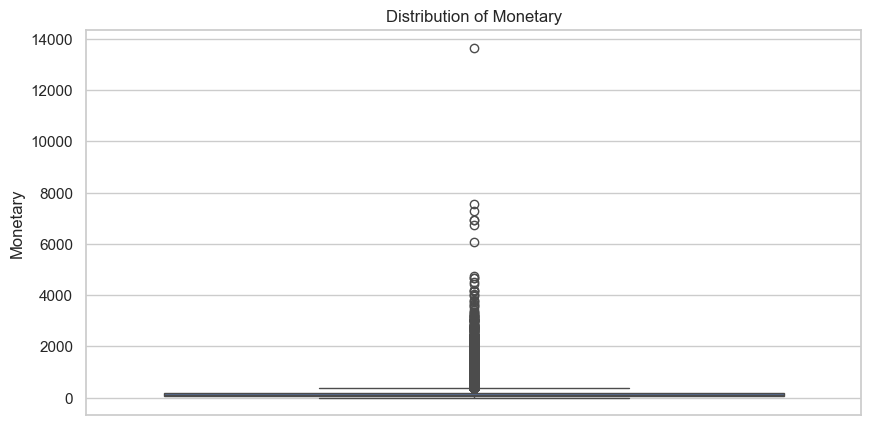

Skewness of R: -0.00875323876321792
Standard deviation of R: 1.4155720318898208


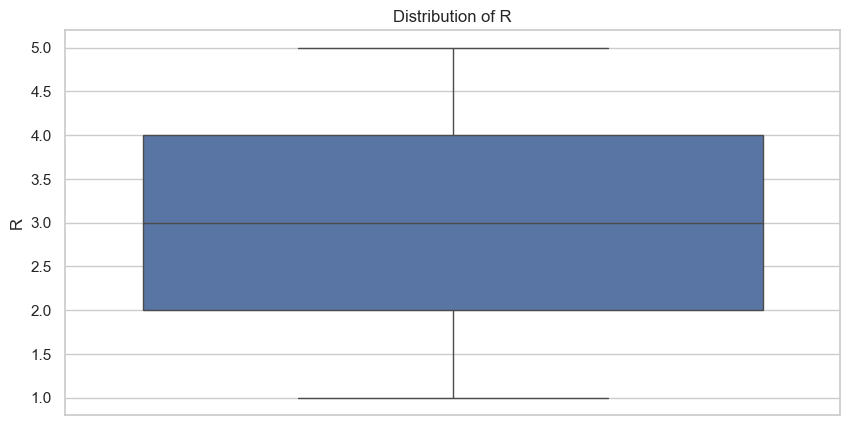

Skewness of F: 5.473708077427354
Standard deviation of F: 0.6863968587192304


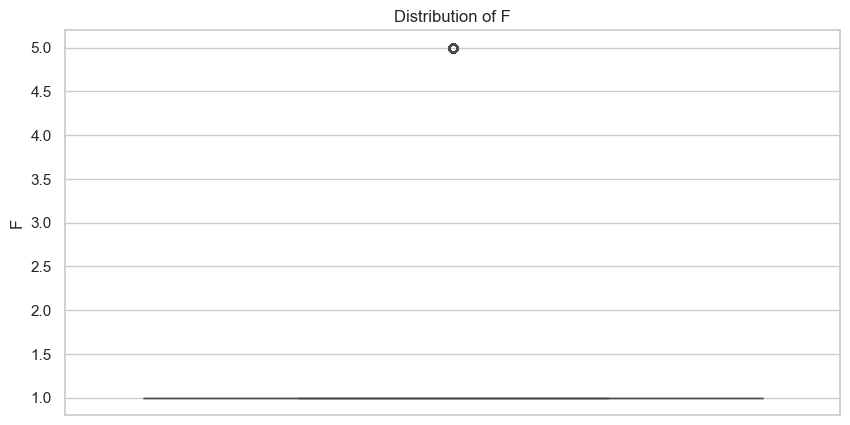

Skewness of M: 0.0011725394385676301
Standard deviation of M: 1.4146431009095732


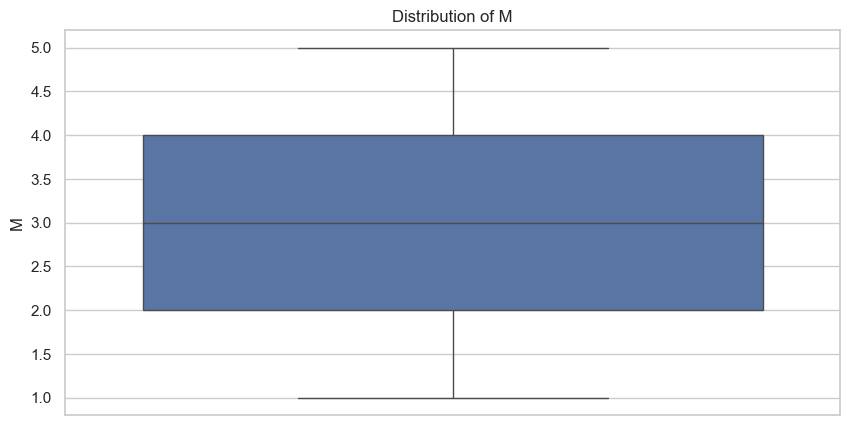

In [76]:
groupedData['churn_state'] = groupedData['churn_state'].astype('object') #I don't want see churn as a result so I converted to object temporarily

# Outlier Treatment
for col in groupedData.select_dtypes(include = np.number).columns:
    plt.figure(figsize = (10, 5))
    print(f'Skewness of {col}: {groupedData[col].skew()}')
    print(f'Standard deviation of {col}: {groupedData[col].std()}')
    sns.boxplot(groupedData[col])
    plt.title(f'Distribution of {col}')
    plt.show()



In [77]:
groupedData.drop(columns = ['order_id', 'product_id', 'Frequency'], axis = 1, inplace = True)

# Since the columns order_id, product_id and Frequency has standard deviation almost equal to 0, 
# we are dropping those columns, as it would not add value to the model building.

In [78]:
groupedData_outlierTreated = groupedData.copy()

In [79]:
groupedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92070 entries, 0 to 92069
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_unique_id    92070 non-null  object 
 1   delivery_duration     92070 non-null  float64
 2   price                 92070 non-null  float64
 3   freight_value         92070 non-null  float64
 4   product_weight_g      92070 non-null  float64
 5   product_length_cm     92070 non-null  float64
 6   product_height_cm     92070 non-null  float64
 7   product_width_cm      92070 non-null  float64
 8   payment_type          92070 non-null  object 
 9   payment_installments  92070 non-null  int64  
 10  payment_value         92070 non-null  float64
 11  review_score          91473 non-null  float64
 12  Recency               92070 non-null  int64  
 13  Monetary              92070 non-null  float64
 14  churn_state           92070 non-null  object 
 15  R                  

In [80]:
groupedData.isnull().sum()

customer_unique_id        0
delivery_duration         0
price                     0
freight_value             0
product_weight_g          0
product_length_cm         0
product_height_cm         0
product_width_cm          0
payment_type              0
payment_installments      0
payment_value             0
review_score            597
Recency                   0
Monetary                  0
churn_state               0
R                         0
F                         0
M                         0
RFM_Segments_Trio         0
RFM_Segments              0
dtype: int64

In [81]:
for i in groupedData_outlierTreated.select_dtypes(include = np.number).columns:
    q1 = groupedData_outlierTreated[i].quantile(0.25)
    q3 = groupedData_outlierTreated[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    groupedData_outlierTreated[i] = np.where(groupedData_outlierTreated[i]>ul,ul,groupedData_outlierTreated[i])
    groupedData_outlierTreated[i] = np.where(groupedData_outlierTreated[i]<ll,ll,groupedData_outlierTreated[i])

Skewness of delivery_duration: 0.8820081050188691
Standard deviation of delivery_duration: 7.108580434686399


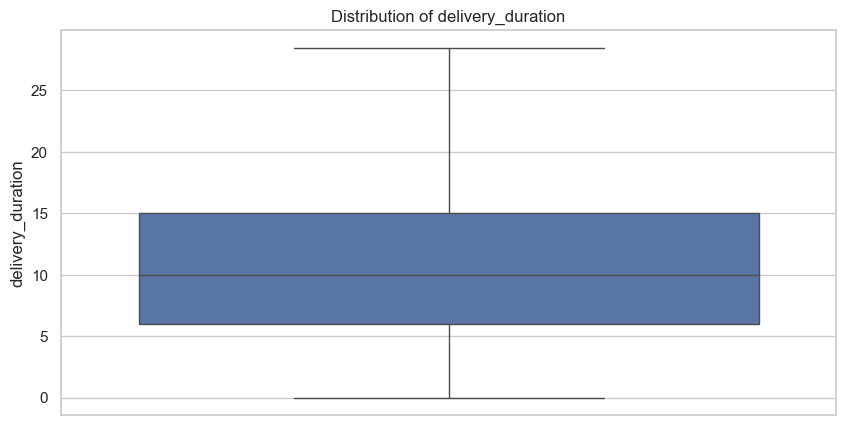

Skewness of price: 1.0586970656974397
Standard deviation of price: 92.31750557543012


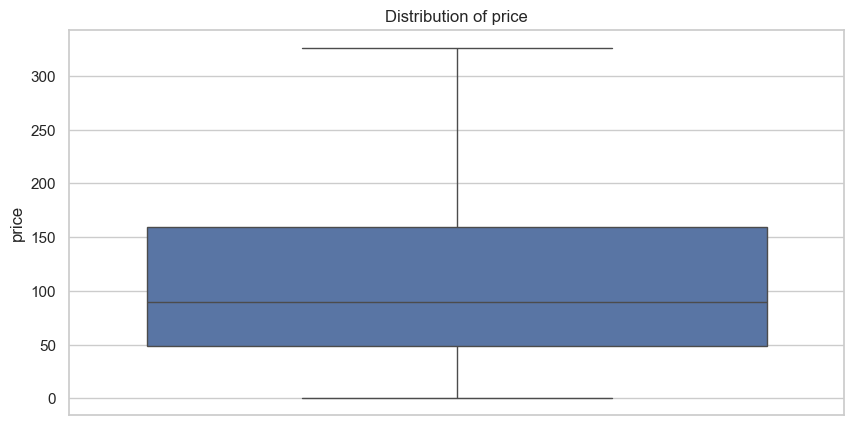

Skewness of freight_value: 0.9889167083236353
Standard deviation of freight_value: 11.20517890378309


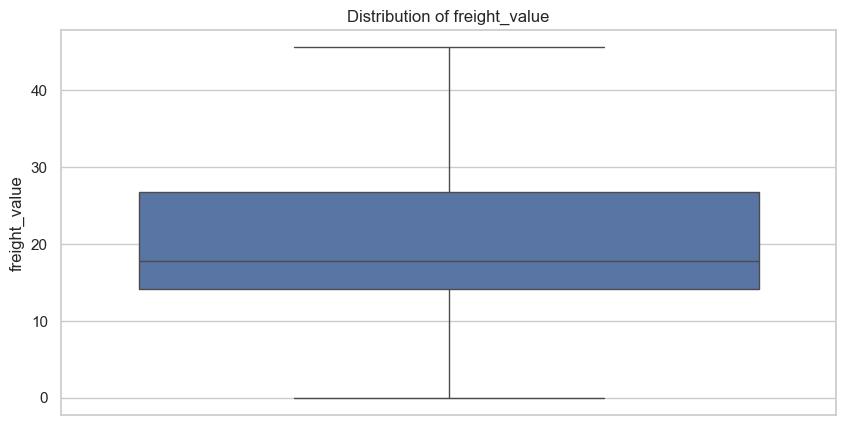

Skewness of product_weight_g: 1.1915210320539578
Standard deviation of product_weight_g: 1780.9054547214516


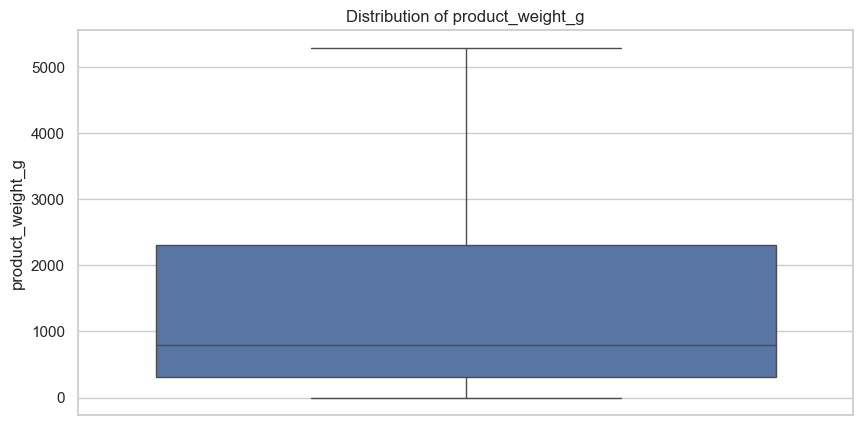

Skewness of product_length_cm: 1.0899746383400397
Standard deviation of product_length_cm: 18.847341103006258


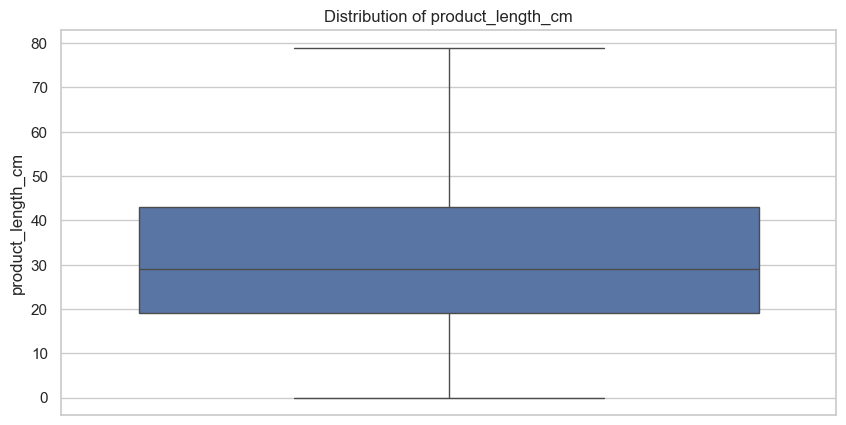

Skewness of product_height_cm: 0.9803170512942536
Standard deviation of product_height_cm: 12.649760880301749


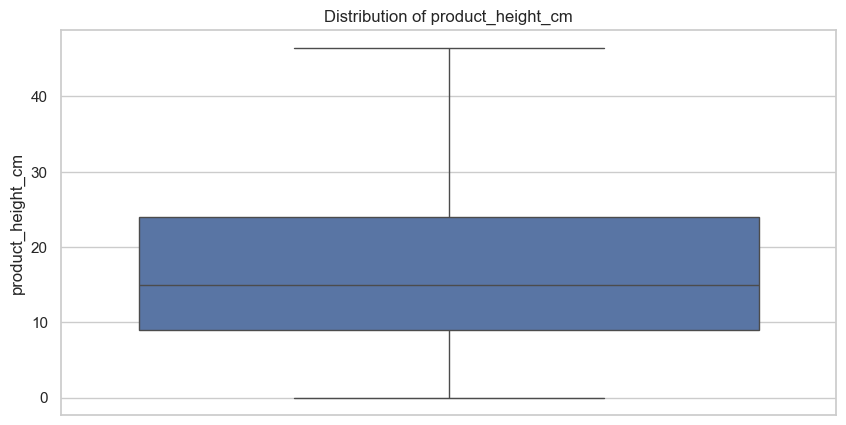

Skewness of product_width_cm: 1.1231726226539815
Standard deviation of product_width_cm: 14.512440697588906


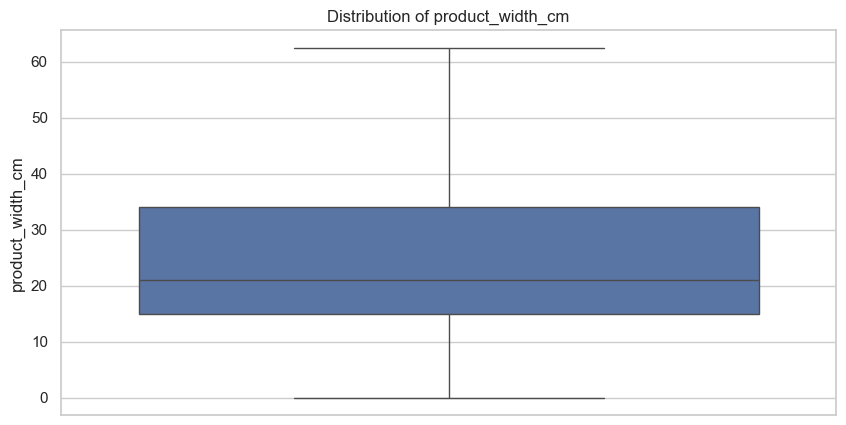

Skewness of payment_installments: 1.2123437069456036
Standard deviation of payment_installments: 2.438766971167843


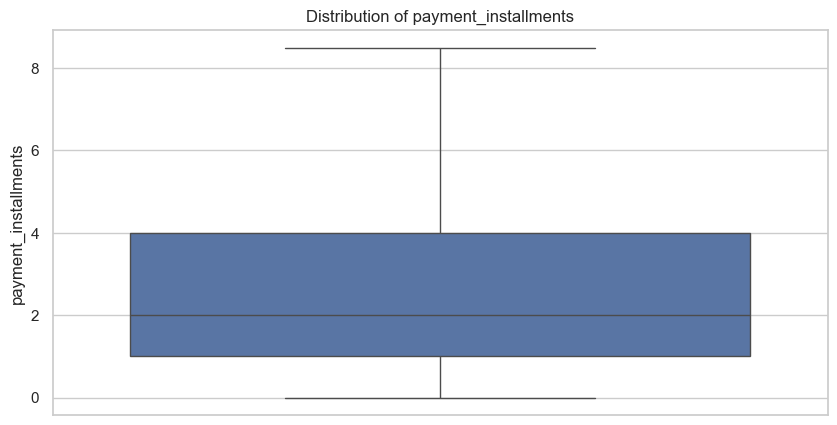

Skewness of payment_value: 1.096019749454969
Standard deviation of payment_value: 117.73349812994927


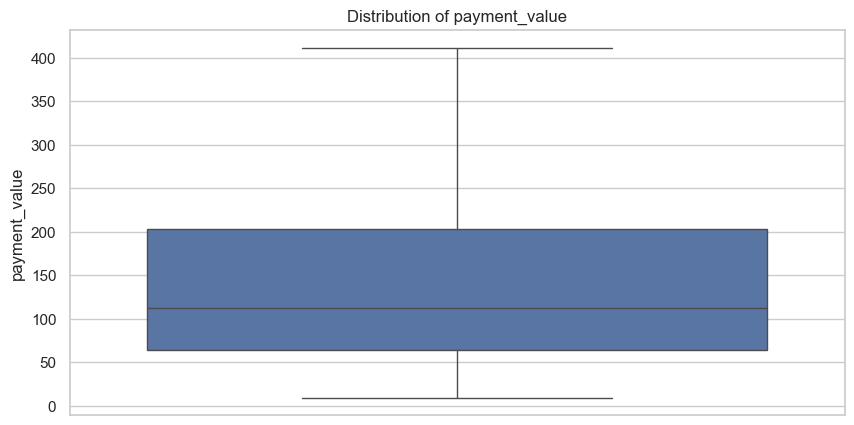

Skewness of review_score: -0.9615864858593788
Standard deviation of review_score: 0.9276392078906794


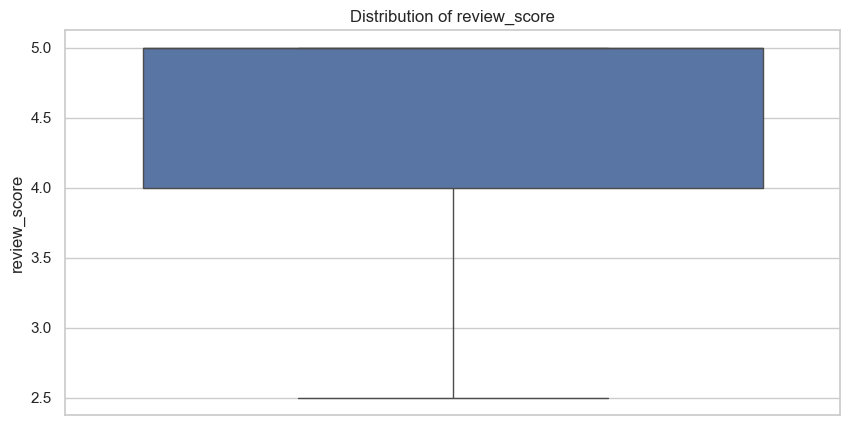

Skewness of Recency: 0.45093981415278106
Standard deviation of Recency: 152.56421724038904


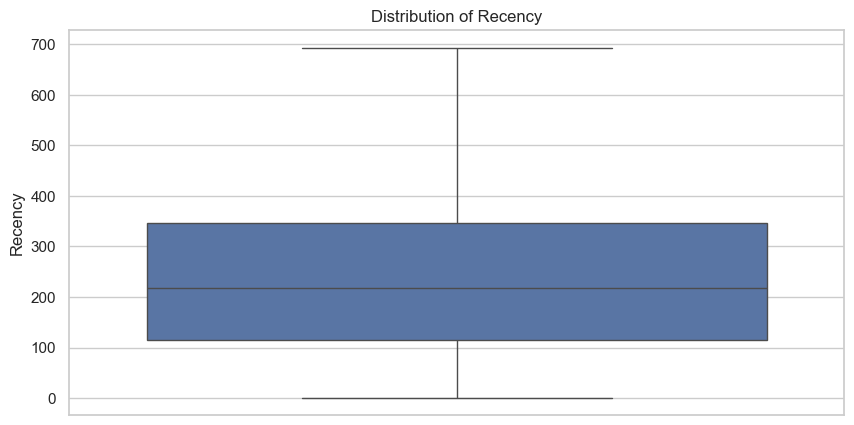

Skewness of Monetary: 1.072933287192141
Standard deviation of Monetary: 98.12754109816107


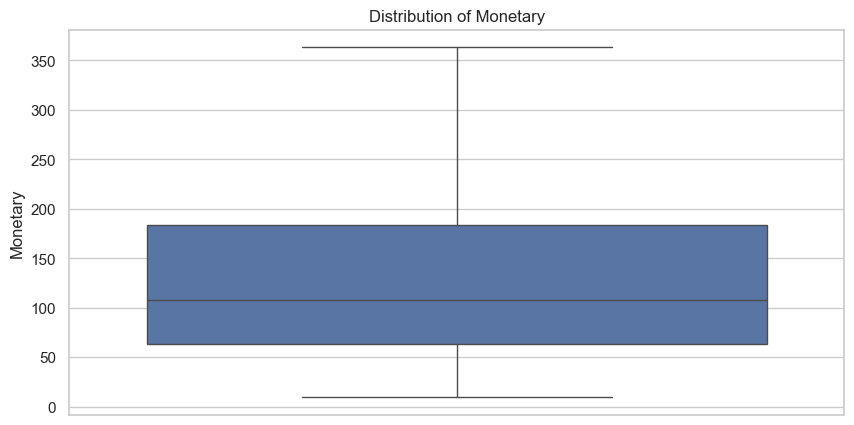

Skewness of R: -0.00875323876321792
Standard deviation of R: 1.4155720318898208


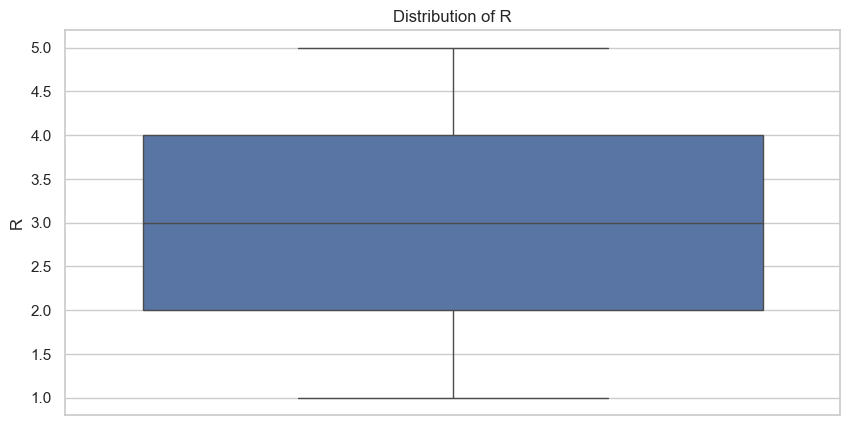

Skewness of F: 0.0
Standard deviation of F: 0.0


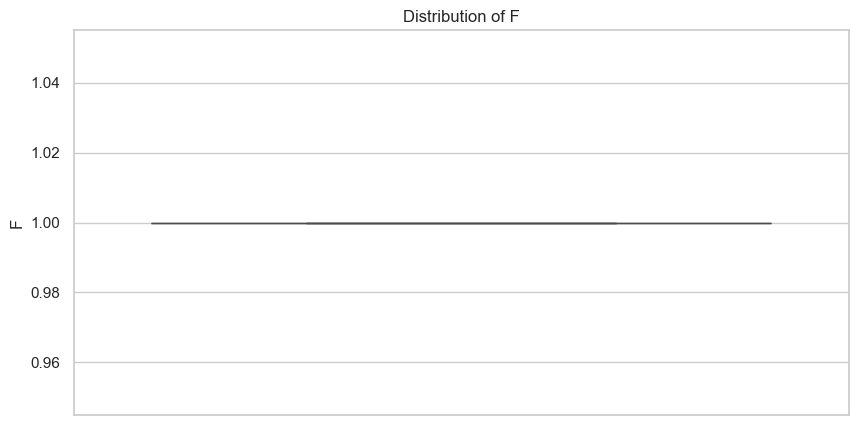

Skewness of M: 0.0011725394385676301
Standard deviation of M: 1.4146431009095732


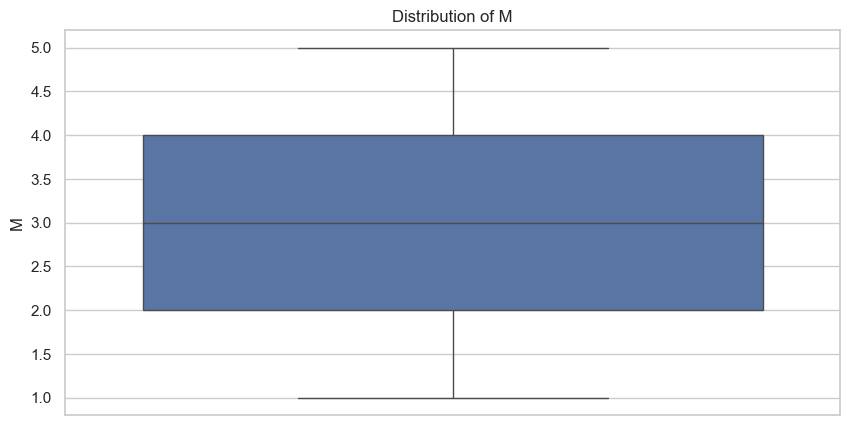

In [82]:
for col in groupedData_outlierTreated.select_dtypes(include = np.number).columns:
    plt.figure(figsize = (10, 5))
    print(f'Skewness of {col}: {groupedData_outlierTreated[col].skew()}')
    print(f'Standard deviation of {col}: {groupedData_outlierTreated[col].std()}')
    sns.boxplot(groupedData_outlierTreated[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [83]:
# The outliers are treated by the method of capping.
# Values which fall outside of the upper and lower whisker are capped to the upper and lower whisker values respectively.
# Since dropping the values would lead to loss of huge volumes of data, we prefer to cap the values.

In [84]:
groupedData_outlierTreated.shape

(92070, 20)

In [85]:
groupedData_outlierTreated['review_score'].value_counts()

review_score
5.000000    53729
4.000000    17906
2.500000    11667
3.000000     7568
4.500000      219
3.500000      113
3.666667       53
4.666667       50
4.333333       44
4.250000       16
4.750000       11
3.333333       10
4.800000        9
3.400000        9
2.666667        8
4.200000        7
3.250000        5
3.800000        5
2.600000        5
3.750000        4
4.400000        4
4.600000        3
2.800000        2
4.428571        2
3.200000        2
3.285714        2
2.750000        2
3.444444        1
4.857143        1
2.571429        1
4.444444        1
3.555556        1
4.076923        1
4.363636        1
3.100000        1
2.642857        1
4.777778        1
4.222222        1
3.857143        1
4.111111        1
4.875000        1
3.777778        1
3.600000        1
2.833333        1
3.685714        1
Name: count, dtype: int64

In [86]:
#COMPARISON OF K_MEANS Clustering AND RFM Analysis Segments
#Applying K-Means Clustering Algorithm
groupedData_outlierTreated_kMeans = groupedData_outlierTreated[['R', 'M']]
#Because of we used capping and quantile function for RFM Scoring, we dont need to use StandardScaler


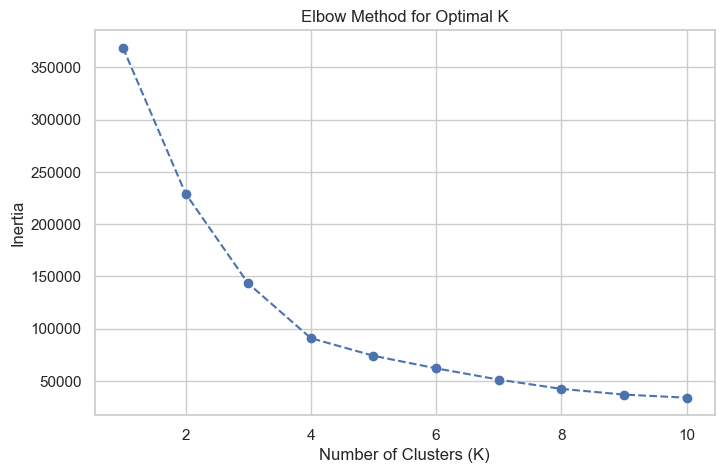

In [87]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  
#Elbow yöntemi ile optimum küme sayısını bul
inertia = []
K_range = range(1, 11)  # 1'den 10'a kadar farklı K değerlerini deniyoruz

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(groupedData_outlierTreated_kMeans)
    inertia.append(kmeans.inertia_)  # Inertia: Küme içi hata kareleri toplamı

#Elbow grafiğini çiz
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [88]:
from sklearn.cluster import KMeans
#En iyi K değerini buraya yaz (grafikteki optimal K değeri)
optimal_k = 9  # Bunu Elbow grafiğine göre değiştir

# K-Means modelini oluştur ve RFM verisine uygula
kmeans = KMeans(n_clusters=optimal_k,random_state=42)
groupedData_outlierTreated_kMeans['KMeans'] = kmeans.fit_predict(groupedData_outlierTreated_kMeans)
# Küme sayılarını göster
print(groupedData_outlierTreated_kMeans['KMeans'].value_counts())

KMeans
4    15286
5    14322
2    11268
3    10767
0    10737
6     7639
1     7531
7     7282
8     7238
Name: count, dtype: int64


In [89]:
# groupedData_outlierTreated['RFM_Customer_Codes'].value_counts()
rfm['RFM_Segments'].value_counts()

RFM_Segments
Lost                   18474
Hibernating            11559
Champions              11528
New Customers          10874
Loyal Customers         7668
Need Attention          7419
About to Sleep          7385
At Risk                 7374
Potential Loyalists     7357
Lost VIPs               3711
Name: count, dtype: int64

In [90]:
rfm_kmeans_crosstab=pd.crosstab(groupedData_outlierTreated['RFM_Segments'], groupedData_outlierTreated_kMeans['KMeans'])

mapping= rfm_kmeans_crosstab.idxmax()
print(mapping)

KMeans
0                At Risk
1    Potential Loyalists
2            Hibernating
3         Need Attention
4              Champions
5          New Customers
6                   Lost
7         About to Sleep
8                   Lost
dtype: object


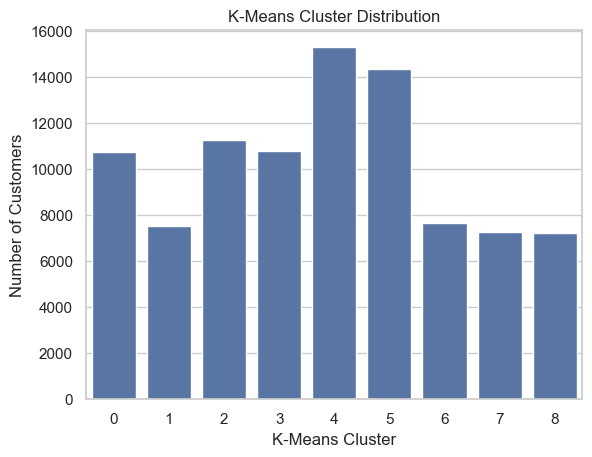

KMeans                  0     1     2     3      4      5     6     7     8
RFM_Segments                                                               
About to Sleep          0     0     0     0      0      0     0  7282     0
At Risk              3709     0     0  3581      0      0     0     0     0
Champions               0     0     0     0  11479      0     0     0     0
Hibernating             0     0  7793     0      0      0     0     0  3617
Lost                 3361     0  3475     0      0      0  7639     0  3621
Lost VIPs            3667     0     0     0      0      0     0     0     0
Loyal Customers         0  3747     0     0   3807      0     0     0     0
Need Attention          0     0     0  7186      0      0     0     0     0
New Customers           0     0     0     0      0  10805     0     0     0
Potential Loyalists     0  3784     0     0      0   3517     0     0     0


In [91]:
# Eski RFM segmentlerini ve yeni K-Means kümelerini aynı tabloda göster
# rfm_compare = groupedData_outlierTreated.copy()
# rfm_compare['KMeans_Cluster'] = groupedData_outlierTreated_kMeans['KMeans']

# K-Means kümelerinin dağılımını gör
sns.countplot(x=groupedData_outlierTreated_kMeans['KMeans'])
plt.title("K-Means Cluster Distribution")
plt.xlabel("K-Means Cluster")
plt.ylabel("Number of Customers")
plt.show()

# RFM segmentleri ile K-Means kümelerini çapraz tablo ile karşılaştırma
comparisontable = pd.crosstab(groupedData_outlierTreated['RFM_Segments'], groupedData_outlierTreated_kMeans['KMeans'])
print(comparisontable)


In [92]:
groupedData_outlierTreated_kMeans.groupby('KMeans')[['R', 'M']].mean()

R         M
KMeans                    
0       1.345441  4.686970
1       4.497543  3.000000
2       2.341409  1.350195
3       2.667410  4.327296
4       4.501701  4.497841
5       4.503491  1.491970
6       1.000000  1.506349
7       3.000000  2.506454
8       1.499724  3.000000

In [93]:
print(comparisontable.loc['Lost'])  # sadece Lost segmenti için küme dağılımı

KMeans
0    3361
1       0
2    3475
3       0
4       0
5       0
6    7639
7       0
8    3621
Name: Lost, dtype: int64


In [94]:
RFM_KMeans_Cross = pd.crosstab(groupedData_outlierTreated['RFM_Segments'], groupedData_outlierTreated_kMeans['KMeans'])

# Oranlara bak
ratios = RFM_KMeans_Cross.div(RFM_KMeans_Cross.sum(axis=0), axis=1)
print(ratios)

KMeans                      0         1         2        3         4  \
RFM_Segments                                                           
About to Sleep       0.000000  0.000000  0.000000  0.00000  0.000000   
At Risk              0.345441  0.000000  0.000000  0.33259  0.000000   
Champions            0.000000  0.000000  0.000000  0.00000  0.750949   
Hibernating          0.000000  0.000000  0.691605  0.00000  0.000000   
Lost                 0.313030  0.000000  0.308395  0.00000  0.000000   
Lost VIPs            0.341529  0.000000  0.000000  0.00000  0.000000   
Loyal Customers      0.000000  0.497543  0.000000  0.00000  0.249051   
Need Attention       0.000000  0.000000  0.000000  0.66741  0.000000   
New Customers        0.000000  0.000000  0.000000  0.00000  0.000000   
Potential Loyalists  0.000000  0.502457  0.000000  0.00000  0.000000   

KMeans                      5    6    7         8  
RFM_Segments                                       
About to Sleep       0.000000  

In [95]:
Trio_Cross = pd.crosstab(groupedData_outlierTreated['RFM_Segments_Trio'], groupedData_outlierTreated_kMeans['KMeans'])

# Oranlara bak
trio_ratio = Trio_Cross.div(Trio_Cross.sum(axis=0), axis=1)
print(trio_ratio)

KMeans               0         1    2        3    4    5    6    7    8
RFM_Segments_Trio                                                      
High Value         0.0  0.497543  0.0  0.00000  1.0  0.0  0.0  0.0  0.0
Low Value          1.0  0.000000  1.0  0.33259  0.0  0.0  1.0  0.0  1.0
Mid Value          0.0  0.502457  0.0  0.66741  0.0  1.0  0.0  1.0  0.0


In [96]:
rfm_compare = groupedData_outlierTreated.copy()
rfm_compare['KMeans'] = groupedData_outlierTreated_kMeans['KMeans']
rfm_compare.groupby('KMeans')[['R', 'F', 'M']].mean()


R    F         M
KMeans                         
0       1.345441  1.0  4.686970
1       4.497543  1.0  3.000000
2       2.341409  1.0  1.350195
3       2.667410  1.0  4.327296
4       4.501701  1.0  4.497841
5       4.503491  1.0  1.491970
6       1.000000  1.0  1.506349
7       3.000000  1.0  2.506454
8       1.499724  1.0  3.000000

In [97]:
print(groupedData_outlierTreated.groupby("RFM_Segments_Trio")["Recency"].mean())

RFM_Segments_Trio
High Value     82.212946
Low Value     377.939624
Mid Value     153.039633
Name: Recency, dtype: float64


In [98]:
segment_churn_rates = groupedData_outlierTreated.groupby("RFM_Segments")["churn_state"].mean()
print(segment_churn_rates)

RFM_Segments
About to Sleep         0.281516
At Risk                     1.0
Champions                   0.0
Hibernating             0.74794
Lost                        1.0
Lost VIPs                   1.0
Loyal Customers             0.0
Need Attention         0.273588
New Customers               0.0
Potential Loyalists         0.0
Name: churn_state, dtype: object


In [99]:
#Missing Value Treatment
groupedData_outlierTreated.isna().sum() / len(groupedData_outlierTreated) * 100

customer_unique_id      0.00000
delivery_duration       0.00000
price                   0.00000
freight_value           0.00000
product_weight_g        0.00000
product_length_cm       0.00000
product_height_cm       0.00000
product_width_cm        0.00000
payment_type            0.00000
payment_installments    0.00000
payment_value           0.00000
review_score            0.64842
Recency                 0.00000
Monetary                0.00000
churn_state             0.00000
R                       0.00000
F                       0.00000
M                       0.00000
RFM_Segments_Trio       0.00000
RFM_Segments            0.00000
dtype: float64

In [100]:
#Multi-variate Analysis
#Target Imbalance
groupedData_outlierTreated['churn_state'].value_counts(normalize = True) * 100

churn_state
0    54.813729
1    45.186271
Name: proportion, dtype: float64

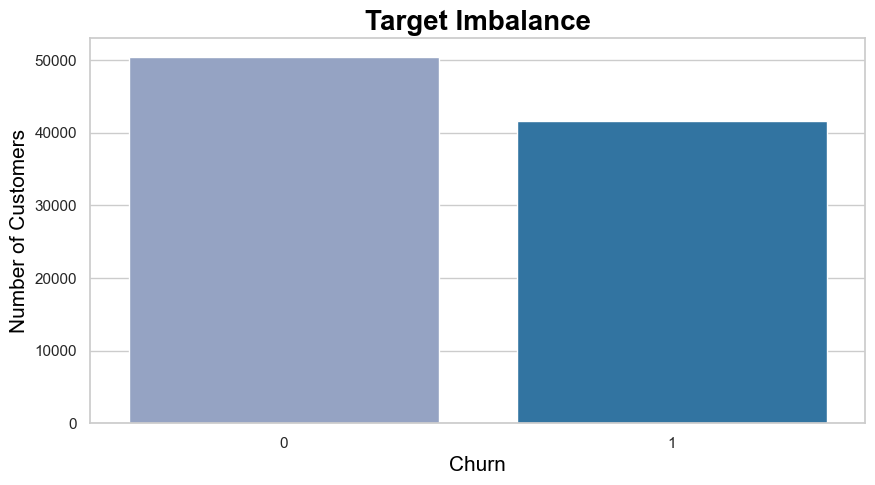

In [101]:
# plt.figure(figsize=(10, 5))
# sns.countplot(x=groupedData_outlierTreated['churn_state'])  # x argümanı eklendi
# plt.xlabel('Churn', color='black', fontsize=15)
# plt.title('Target imbalance', color='black', fontsize=20, fontweight='bold')
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Pastel renk seçimi
pastel_colors = ['#8da0cb', '#1f78b4']  # Açık mavi ve pastel turuncu

plt.figure(figsize=(10, 5))
sns.countplot(
    x='churn_state',
    data=groupedData_outlierTreated,
    palette=pastel_colors 
)
plt.xlabel('Churn', color='black', fontsize=15)
plt.ylabel('Number of Customers', color='black', fontsize=15)
plt.title('Target Imbalance', color='black', fontsize=20, fontweight='bold')
plt.show()


In [102]:
# Target variable is balanced. So we do not require upsampling of the data using SMOTE.

In [103]:
churn_by_segment_all = groupedData_outlierTreated.groupby(["RFM_Segments","RFM_Segments_Trio"])["churn_state"].mean() * 100
print(churn_by_segment_all)

RFM_Segments         RFM_Segments_Trio
About to Sleep       Mid Value            28.151607
At Risk              Low Value                100.0
Champions            High Value                 0.0
Hibernating          Low Value             74.79404
Lost                 Low Value                100.0
Lost VIPs            Low Value                100.0
Loyal Customers      High Value                 0.0
Need Attention       Mid Value            27.358753
New Customers        Mid Value                  0.0
Potential Loyalists  Mid Value                  0.0
Name: churn_state, dtype: object


In [104]:
churn_by_segment_new = groupedData_outlierTreated.groupby(["RFM_Segments"])["churn_state"].mean() * 100
print(churn_by_segment_new)

RFM_Segments
About to Sleep         28.151607
At Risk                    100.0
Champions                    0.0
Hibernating             74.79404
Lost                       100.0
Lost VIPs                  100.0
Loyal Customers              0.0
Need Attention         27.358753
New Customers                0.0
Potential Loyalists          0.0
Name: churn_state, dtype: object


In [105]:
churn_by_segment_trio = groupedData_outlierTreated.groupby(["RFM_Segments_Trio"])["churn_state"].mean() * 100
print(churn_by_segment_trio)

RFM_Segments_Trio
High Value          0.0
Low Value     92.892272
Mid Value     12.328851
Name: churn_state, dtype: object


In [106]:
#Feature analyze of churned customers
churned_customers = groupedData_outlierTreated[groupedData_outlierTreated['churn_state'] == 1]  # Churn olmuş müşterileri seç
print(churned_customers.describe())

       delivery_duration         price  freight_value  product_weight_g  \
count       41603.000000  41603.000000   41603.000000      41603.000000   
mean           11.996922    118.329055      21.171374       1690.578420   
std             6.848688     92.712346      10.755077       1785.841704   
min             0.000000      2.290000       0.000000          0.000000   
25%             7.000000     49.000000      14.110000        350.000000   
50%            11.000000     89.900000      16.950000        900.000000   
75%            16.000000    159.980000      26.160000       2400.000000   
max            28.500000    326.400000      45.525000       5292.500000   

       product_length_cm  product_height_cm  product_width_cm  \
count       41603.000000       41603.000000      41603.000000   
mean           35.186934          18.535899         27.196873   
std            19.059569          13.032996         14.778188   
min             0.000000           0.000000          0.000000   

In [107]:
not_churned_customers = groupedData_outlierTreated[groupedData_outlierTreated['churn_state'] == 0]  # Churn olmuş müşterileri seç
print(not_churned_customers.describe())

       delivery_duration         price  freight_value  product_weight_g  \
count       50467.000000  50467.000000   50467.000000      50467.000000   
mean           11.087316    118.231956      21.726263       1586.432233   
std             7.290357     91.991636      11.557146       1775.463875   
min             0.000000      0.850000       0.000000          0.000000   
25%             6.000000     48.000000      13.910000        300.000000   
50%             9.000000     89.990000      18.270000        725.000000   
75%            15.000000    159.490000      26.980000       2175.000000   
max            28.500000    326.400000      45.525000       5292.500000   

       product_length_cm  product_height_cm  product_width_cm  \
count       50467.000000       50467.000000      50467.000000   
mean           33.477143          17.684764         25.850774   
std            18.635354          12.311722         14.261122   
min             9.000000           2.000000          7.000000   

In [108]:
# Average delivery date of churned customers
churned_avg_delivery = groupedData_outlierTreated[groupedData_outlierTreated['churn_state'] == 1]['delivery_duration'].mean()

# Average delivery date of not churned customers
not_churned_avg_delivery = groupedData_outlierTreated[groupedData_outlierTreated['churn_state'] == 0]['delivery_duration'].mean()

print(f"Average delivery date of churned customers: {churned_avg_delivery:.2f} gün")
print(f"Average delivery date of not churned customers: {not_churned_avg_delivery:.2f} gün")

Average delivery date of churned customers: 12.00 gün
Average delivery date of not churned customers: 11.09 gün


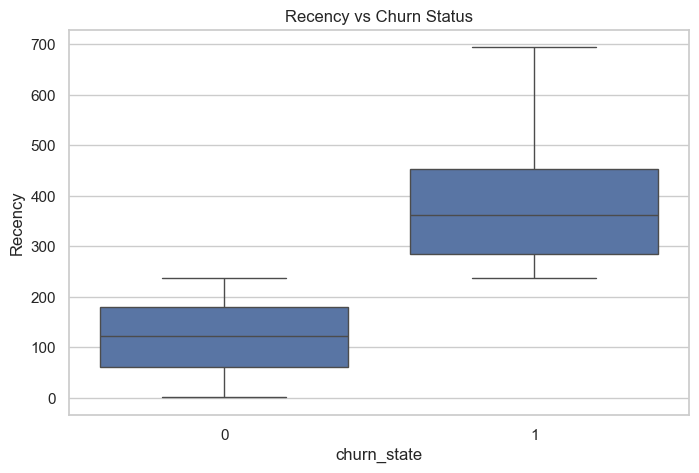

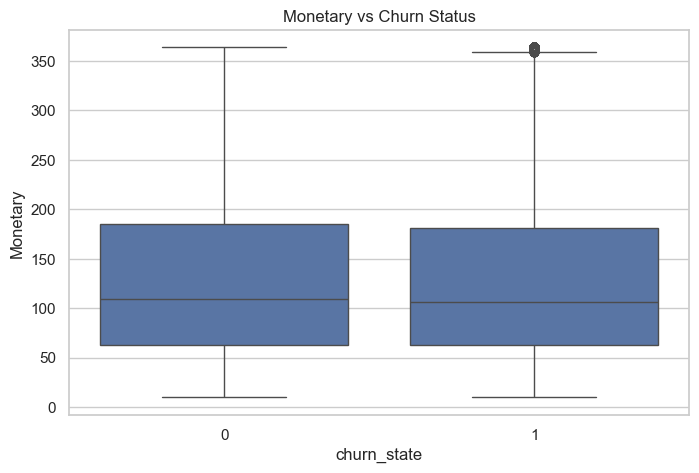

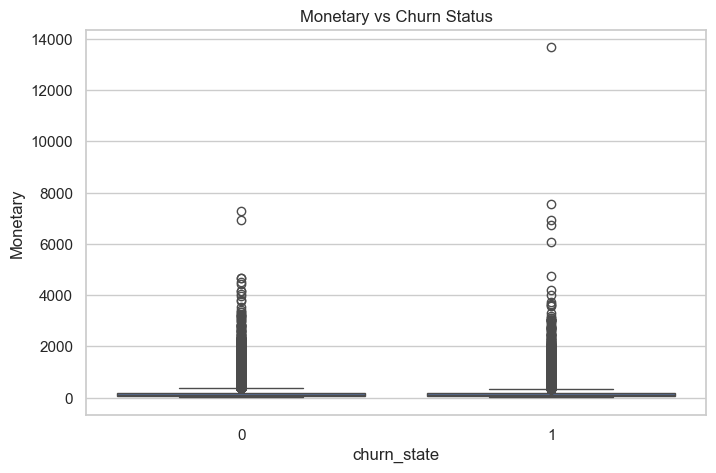

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

#RECENCY CHURN ILISKISI
plt.figure(figsize=(8, 5))
sns.boxplot(x=groupedData_outlierTreated["churn_state"], y=groupedData_outlierTreated["Recency"])
plt.title("Recency vs Churn Status")
plt.show()

#FREQUENCY CHURN ILISKISI
# plt.figure(figsize=(8, 5))
# sns.boxplot(x=groupedData_outlierTreated["churn_state"], y=groupedData_outlierTreated["Frequency"])
# plt.title("Frequency vs Churn Status")
# plt.show()

#MONETARY CHURN ILSIKISI
plt.figure(figsize=(8, 5))
sns.boxplot(x=groupedData_outlierTreated["churn_state"], y=groupedData_outlierTreated["Monetary"])
plt.title("Monetary vs Churn Status")
plt.show()

#with data which is not treated for outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=groupedData["churn_state"], y=groupedData["Monetary"])
plt.title("Monetary vs Churn Status")
plt.show()

In [110]:
churn_segment = groupedData_outlierTreated.groupby("RFM_Segments")["churn_state"].mean() * 100
print(churn_segment)

RFM_Segments
About to Sleep         28.151607
At Risk                    100.0
Champions                    0.0
Hibernating             74.79404
Lost                       100.0
Lost VIPs                  100.0
Loyal Customers              0.0
Need Attention         27.358753
New Customers                0.0
Potential Loyalists          0.0
Name: churn_state, dtype: object


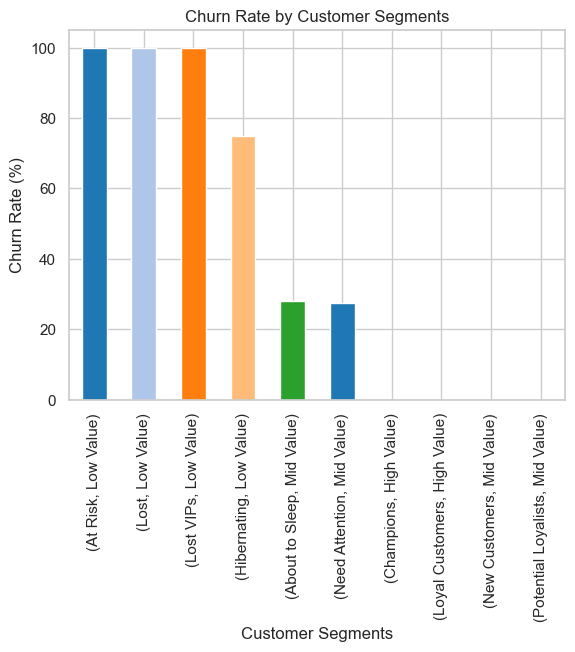

In [111]:
# plt.figure(figsize=(10,6))
# sns.barplot(x=churn_by_segment.index, y=churn_by_segment.values, palette="Blues_r")
# plt.title("Churn Rate by RFM Segment (Updated)")
# plt.xlabel("RFM Segment")
# plt.ylabel("Churn Rate (%)")
# plt.xticks(rotation=45)
# plt.show()
#CHURN ANALYZE UP TO SEGMENT
churn_by_segment_all.sort_values(ascending=False).plot(kind='bar', color=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c'])
plt.title("Churn Rate by Customer Segments")
plt.xlabel("Customer Segments")
plt.ylabel("Churn Rate (%)")
plt.show()

In [112]:
delivery_performance_by_segment = groupedData_outlierTreated.groupby("RFM_Segments")["delivery_duration"].mean()
print(delivery_performance_by_segment)

RFM_Segments
About to Sleep         13.800401
At Risk                12.944546
Champions              10.477234
Hibernating            12.174457
Lost                   11.091000
Lost VIPs              12.172233
Loyal Customers        10.425084
Need Attention         15.196917
New Customers           7.931637
Potential Loyalists    11.726716
Name: delivery_duration, dtype: float64


In [113]:
missing_churn = groupedData_outlierTreated[
    (groupedData_outlierTreated['RFM_Segments'] == 'Hibernating') &
    (groupedData_outlierTreated['RFM_Segments_Trio'] == 'Mid Value') &
    (groupedData_outlierTreated['churn_state'].isna())
]
print(len(missing_churn))  # How many churn_state equal to NaN 

0


In [114]:
groupedData_outlierTreated['churn_state'] = groupedData_outlierTreated['churn_state'].astype(int)

In [115]:
#ANSWER TO FIRST QUESTION
# Chi-Square Test of Independence
pd.crosstab(groupedData_outlierTreated['RFM_Segments'], groupedData_outlierTreated['churn_state'])

from scipy.stats import chi2_contingency

table = pd.crosstab(groupedData_outlierTreated['RFM_Segments'], groupedData_outlierTreated['churn_state'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"ChiSquare: {chi2}, p-value: {p}")

ChiSquare: 71672.55801939021, p-value: 0.0


In [116]:
print("p-value (scientific):", "{:.20f}".format(p))

p-value (scientific): 0.00000000000000000000


In [117]:
print("p-değeri gerçekten sıfır mı? :", p == 0)

p-değeri gerçekten sıfır mı? : True


In [118]:
print("p-value (scientific notation):", f"{p:.2e}")

p-value (scientific notation): 0.00e+00


In [119]:
pd.crosstab(groupedData_outlierTreated['RFM_Segments_Trio'], groupedData_outlierTreated['churn_state'])

from scipy.stats import chi2_contingency

table_3 = pd.crosstab(groupedData_outlierTreated['RFM_Segments_Trio'], groupedData_outlierTreated['churn_state'])
chi2, p, dof, expected = chi2_contingency(table_3)
print(f"ChiSquare: {chi2}, p-value: {p}")

ChiSquare: 67068.44544906869, p-value: 0.0


In [120]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder=LabelEncoder()
groupedData_outlierTreated=pd.get_dummies(groupedData_outlierTreated, columns=['RFM_Segments_Trio'], drop_first=False)
groupedData_outlierTreated=pd.get_dummies(groupedData_outlierTreated, columns=['RFM_Segments'], drop_first=False)

In [121]:
groupedData_outlierTreated.head()

customer_unique_id  delivery_duration   price  freight_value  \
0  0000366f3b9a7992bf8c76cfdf3221e2                6.0  129.90          12.00   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                3.0   18.90           8.29   
2  0000f46a3911fa3c0805444483337064               25.0   69.00          17.22   
3  0000f6ccb0745a6a4b88665a16c9f078               20.0   25.99          17.63   
4  0004aac84e0df4da2b147fca70cf8255               13.0  180.00          16.89   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0            1500.0               34.0                7.0              32.0   
1             375.0               26.0               11.0              18.0   
2            1500.0               25.0               46.5              35.0   
3             150.0               19.0                5.0              11.0   
4            5292.5               16.0                3.0              11.0   

  payment_type  payment_installments  payment_value  review_score  Recency  \
0  credit_card                   8.0         141.90           5.0    112.0   
1  credit_card                   1.0          27.19           4.0    115.0   
2  credit_card                   8.0          86.22           3.0    537.0   
3  credit_card                   4.0          43.62           4.0    321.0   
4  credit_card                   6.0         196.89           5.0    288.0   

   Monetary  churn_state    R    F    M  RFM_Segments_Trio_High Value  \
0    141.90            0  4.0  1.0  4.0                          True   
1     27.19            0  4.0  1.0  1.0                         False   
2     86.22            1  1.0  1.0  2.0                         False   
3     43.62            1  2.0  1.0  1.0                         False   
4    196.89            1  2.0  1.0  4.0                         False   

   RFM_Segments_Trio_Low Value  RFM_Segments_Trio_Mid Value  \
0                        False                        False   
1                        False                         True   
2                         True                        False   
3                         True                        False   
4                         True                        False   

   RFM_Segments_About to Sleep  RFM_Segments_At Risk  RFM_Segments_Champions  \
0                        False                 False                   False   
1                        False                 False                   False   
2                        False                 False                   False   
3                        False                 False                   False   
4                        False                  True                   False   

   RFM_Segments_Hibernating  RFM_Segments_Lost  RFM_Segments_Lost VIPs  \
0                     False              False                   False   
1                     False              False                   False   
2                     False               True                   False   
3                     False               True                   False   
4                     False              False                   False   

   RFM_Segments_Loyal Customers  RFM_Segments_Need Attention  \
0                          True                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   

   RFM_Segments_New Customers  RFM_Segments_Potential Loyalists  
0                       False                             False  
1                        True                             False  
2                       False                             False  
3                       False                             False  
4                       False                             False

In [122]:
groupedData_outlierTreated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92070 entries, 0 to 92069
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_unique_id                92070 non-null  object 
 1   delivery_duration                 92070 non-null  float64
 2   price                             92070 non-null  float64
 3   freight_value                     92070 non-null  float64
 4   product_weight_g                  92070 non-null  float64
 5   product_length_cm                 92070 non-null  float64
 6   product_height_cm                 92070 non-null  float64
 7   product_width_cm                  92070 non-null  float64
 8   payment_type                      92070 non-null  object 
 9   payment_installments              92070 non-null  float64
 10  payment_value                     92070 non-null  float64
 11  review_score                      91473 non-null  float64
 12  Rece

In [123]:
groupedData_outlierTreated['churn_state'] = groupedData_outlierTreated['churn_state'].astype(int)
features = [
    'delivery_duration', 'Monetary',
    # 'review_score',
    # 'Recency',
    'RFM_Segments_Trio_Low Value', 'RFM_Segments_Trio_Mid Value',
    'RFM_Segments_Trio_High Value',
    'RFM_Segments_Champions', 'RFM_Segments_Loyal Customers', 'RFM_Segments_Potential Loyalists',
    'RFM_Segments_New Customers', 'RFM_Segments_Need Attention',
    'RFM_Segments_About to Sleep',
    'RFM_Segments_At Risk', 'RFM_Segments_Hibernating', 'RFM_Segments_Lost VIPs', 'RFM_Segments_Lost',
    # 'RFM_Score',
    'price','freight_value','product_weight_g','product_length_cm','product_height_cm',
    'product_width_cm','payment_installments']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# groupedData_outlierTreated['review_score'] = imputer.fit_transform(groupedData_outlierTreated[['review_score']]).ravel()

X=groupedData_outlierTreated[features]
y=groupedData_outlierTreated['churn_state']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [124]:
# Eksik verileri doldurma IMPUTE ISLEMI 
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')

# groupedData_outlierTreated['review_score'] = imputer.fit_transform(groupedData_outlierTreated[['review_score']])

# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)

In [125]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [126]:
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)

In [127]:
# X_train.isnull().sum()[X_train.isnull().sum() > 0]
groupedData_outlierTreated.isnull().sum()

customer_unique_id                    0
delivery_duration                     0
price                                 0
freight_value                         0
product_weight_g                      0
product_length_cm                     0
product_height_cm                     0
product_width_cm                      0
payment_type                          0
payment_installments                  0
payment_value                         0
review_score                        597
Recency                               0
Monetary                              0
churn_state                           0
R                                     0
F                                     0
M                                     0
RFM_Segments_Trio_High Value          0
RFM_Segments_Trio_Low Value           0
RFM_Segments_Trio_Mid Value           0
RFM_Segments_About to Sleep           0
RFM_Segments_At Risk                  0
RFM_Segments_Champions                0
RFM_Segments_Hibernating              0


In [128]:
null_percentage = groupedData_outlierTreated['review_score'].isnull().mean() * 100
print(f"Review_score sütunundaki eksik değer oranı: {null_percentage:.2f}%")

Review_score sütunundaki eksik değer oranı: 0.65%


In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

conf_matrix=confusion_matrix(y_test, y_pred)
class_report=classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)

print(conf_matrix, class_report, accuracy)

[[9861  165]
 [ 785 7603]]               precision    recall  f1-score   support

           0       0.93      0.98      0.95     10026
           1       0.98      0.91      0.94      8388

    accuracy                           0.95     18414
   macro avg       0.95      0.94      0.95     18414
weighted avg       0.95      0.95      0.95     18414
 0.9484088193765613


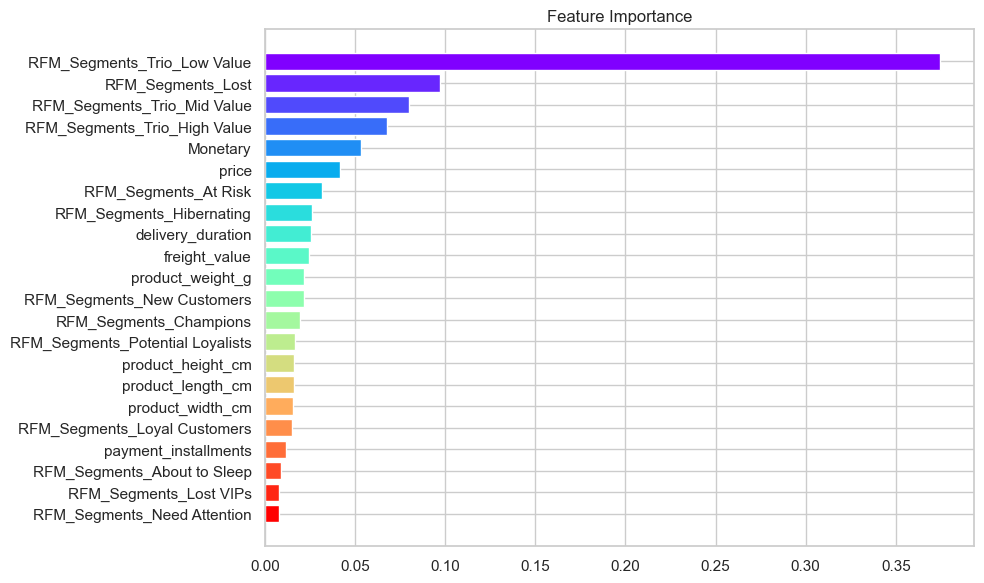

In [130]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

# Renk listesini otomatik üretelim (örneğin matplotlib default colormap'ten)
# colors = plt.cm.tab20(np.linspace(0, 1, X.shape[1]))
colors = plt.cm.rainbow(np.linspace(0, 1, X.shape[1]))

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], color=colors)
plt.yticks(range(X.shape[1]), names)
plt.gca().invert_yaxis()  # Önem sırasına göre yukarıdan aşağıya sıralansın
plt.tight_layout()
plt.show()


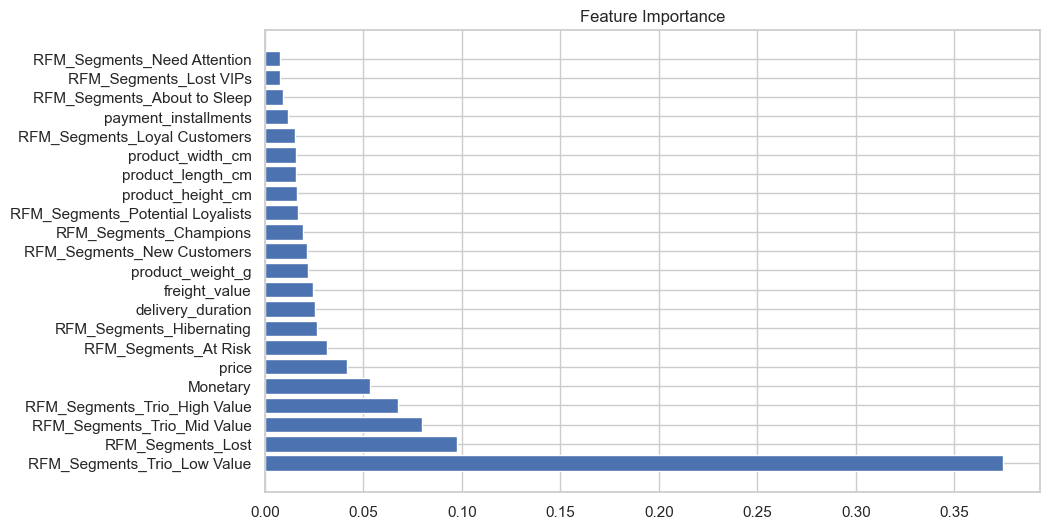

In [131]:
importances=model.feature_importances_
indices=np.argsort(importances)[::-1] #reverses the order of sorted indices
#sot the features are sorted in descending order of importance
names=[features[i] for i in indices] #create a new list names where the feature names are ordered by the importance
#as specified by the indices array.

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices]) #horizontal bar chart icin barh kullandik
plt.yticks(range(X.shape[1]), names)
plt.show()

In [132]:
from sklearn.linear_model import LogisticRegression

#Build and train the Logistic Regression model
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

#Make prediction
y_pred_log_reg=log_reg.predict(X_test)

#Evaluate the model
conf_matrix_log_reg=confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg=classification_report(y_test,y_pred_log_reg)
accuracy_log_reg=accuracy_score(y_test, y_pred_log_reg)

print(conf_matrix_log_reg, class_report_log_reg, accuracy_log_reg)

[[9365  661]
 [ 755 7633]]               precision    recall  f1-score   support

           0       0.93      0.93      0.93     10026
           1       0.92      0.91      0.92      8388

    accuracy                           0.92     18414
   macro avg       0.92      0.92      0.92     18414
weighted avg       0.92      0.92      0.92     18414
 0.9231019876181167


In [133]:
import numpy as np

X_test = np.ascontiguousarray(X_test, dtype=np.float64)  # NumPy dizisine çevir

In [134]:
from sklearn.neighbors import KNeighborsClassifier

#Build and train the Logistic Regression model
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

#Make prediction
y_pred_knn=knn_model.predict(X_test)

#Evaluate the model
conf_matrix_knn=confusion_matrix(y_test, y_pred_knn)
class_report_knn=classification_report(y_test,y_pred_knn)
accuracy_knn=accuracy_score(y_test, y_pred_knn)

print(conf_matrix_knn, class_report_knn, accuracy_knn)

[[9649  377]
 [ 766 7622]]               precision    recall  f1-score   support

           0       0.93      0.96      0.94     10026
           1       0.95      0.91      0.93      8388

    accuracy                           0.94     18414
   macro avg       0.94      0.94      0.94     18414
weighted avg       0.94      0.94      0.94     18414
 0.9379276637341154


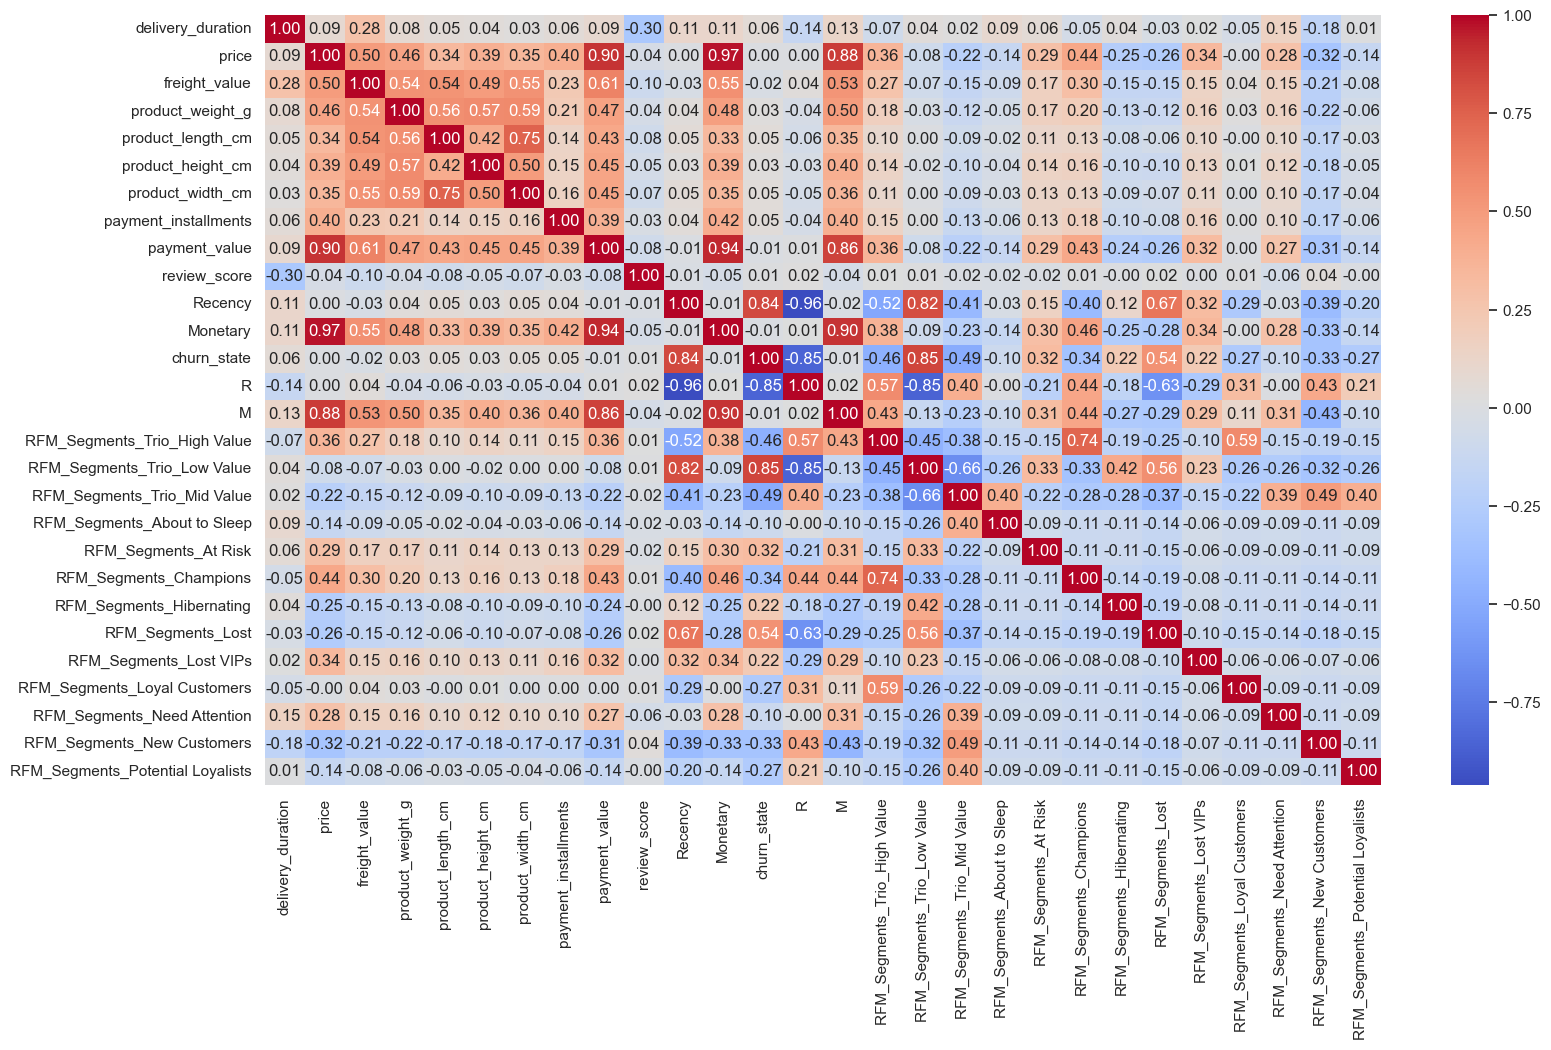

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
groupedData_outlierTreated.replace({True: 1, False: 0}, inplace=True)
correlation_matrix = groupedData_outlierTreated.drop(columns=['customer_unique_id', 'payment_type', 'F']).corr()
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, fmt='.2f', annot=True, cmap='coolwarm')
plt.show()

In [136]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Modeli oluştur ve eğit
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Tahmin yap
y_pred_xgb = xgb_model.predict(X_test)

# Değerlendirme
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(conf_matrix_xgb)
print(class_report_xgb)
print("Accuracy:", accuracy_xgb)


[[9871  155]
 [ 802 7586]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10026
           1       0.98      0.90      0.94      8388

    accuracy                           0.95     18414
   macro avg       0.95      0.94      0.95     18414
weighted avg       0.95      0.95      0.95     18414

Accuracy: 0.9480286738351255


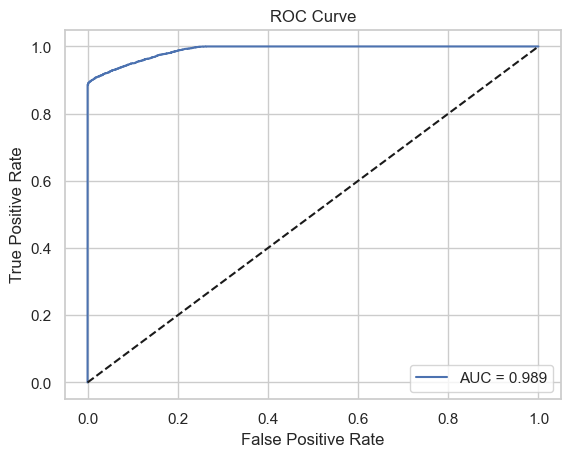

In [137]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [138]:
# X = X.astype(float)

In [139]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif_data = pd.DataFrame()
# vif_data["feature"] = [ 'delivery_duration', 
#     'freight_value', 'Monetary', 'payment_installments',
#     'product_weight_g','product_length_cm','product_height_cm',
#     'product_width_cm','price']
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print(vif_data)

# >10 olanlar Multicollinearity riski iceriyormus.
# Dummy variable trap
# VIF (Varyans Şişirme Faktörü), bağımsız değişkenler (features) arasında aşırı korelasyon (multicollinearity) olup olmadığını gösteren bir ölçümdür.
# Neden Önemlidir?
# Bir regresyon modelinde bazı bağımsız değişkenler birbirine çok benzer bilgi taşıyorsa, modelin bu değişkenleri ayırt etmesi zorlaşır. Bu da:
# Regresyon katsayılarının güvenilmez hale gelmesine neden olur.
# Modelin yorumlanabilirliğini bozar.
# Regresyon katsayıları anlamsız çıkabilir (çok büyük veya çok küçük, negatif sapmalar).

In [140]:
#ANSWER TO SECOND QUESTION
# Logistic Regression Hypothesis Test
# Örnek sadeleştirilmiş features listesi
import statsmodels.api as sm

X = groupedData_outlierTreated[[
    'delivery_duration',
    'RFM_Segments_Trio_Low Value', 
    'freight_value',
    'Monetary',
    'payment_installments',
    'product_weight_g','product_length_cm','product_height_cm',
    'product_width_cm','price'
]]
X_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()
print(result.summary())

features = [
    'delivery_duration',
    'RFM_Low_Value',
    'freight_value',
    'Monetary',
    'payment_installments',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'price'
]

coefficients = [
    0.8286,
    5.9673,
    0.0248,
    0.0086,
    0.2203,
    0.5508,
    0.0239,
    0.0116,
    0.0116,
    0.0035
]



Optimization terminated successfully.
         Current function value: 0.253470
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            churn_state   No. Observations:                92070
Model:                          Logit   Df Residuals:                    92059
Method:                           MLE   Df Model:                           10
Date:                Thu, 01 May 2025   Pseudo R-squ.:                  0.6319
Time:                        21:26:43   Log-Likelihood:                -23337.
converged:                       True   LL-Null:                       -63391.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.8318      0.044    -86.577      0.000   

In [141]:
# ANSWER TO THIRD QUESTION
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XBoost":XGBClassifier()
}

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))



Logistic Regression
Accuracy: 0.9231019876181167
Precision: 0.9203038340969375
Recall: 0.9099904625655698
F1 Score: 0.9151180913559525

KNN
Accuracy: 0.9379276637341154
Precision: 0.9528691086385799
Recall: 0.9086790653314258
F1 Score: 0.9302495880881186

Random Forest
Accuracy: 0.9491148039535137
Precision: 0.9800283468625177
Recall: 0.9067715784453982
F1 Score: 0.9419778314446715

XBoost
Accuracy: 0.9480286738351255
Precision: 0.9799767471902855
Recall: 0.9043872198378636
F1 Score: 0.9406658813317627


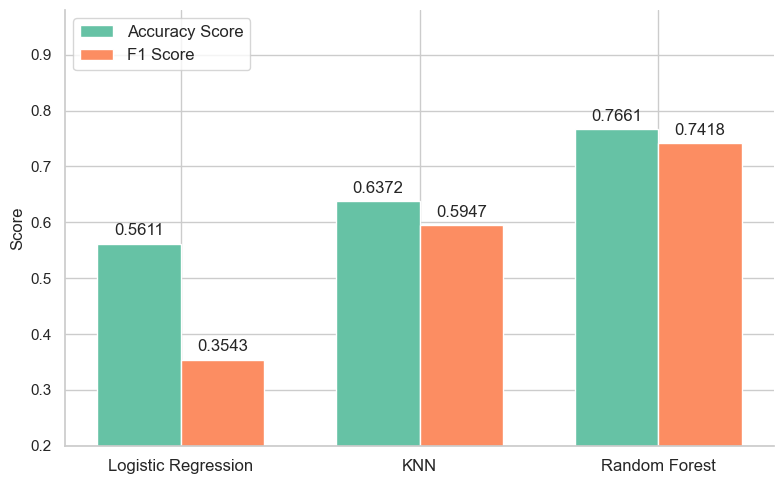

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Model ve skorlar
models = ['Logistic Regression', 'KNN', 'Random Forest']

# Değerler
accuracy = [0.5611, 0.6372, 0.7661]
f1_score = [0.3543, 0.5947, 0.7418]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy Score', color='#66c2a5')
bars2 = ax.bar(x + width/2, f1_score, width, label='F1 Score', color='#fc8d62')

# Başlık ve etiketler
ax.set_ylabel('Score', fontsize=12)
# ax.set_title('Comparison of Accuracy and F1 Scores for Three Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(loc='upper left', fontsize=12)

# Değerleri çubukların üzerine yaz
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=12)

add_labels(bars1)
add_labels(bars2)

# Grafik stil ayarları
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.20, 0.98)

plt.tight_layout()
plt.show()


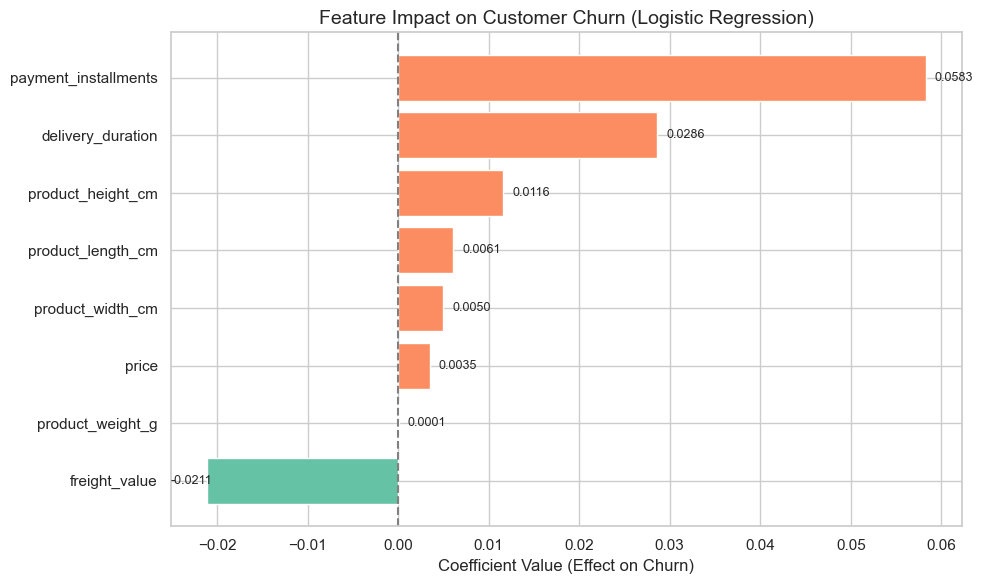

In [144]:
import matplotlib.pyplot as plt
import pandas as pd

# En anlamlı ve temizlenmiş özellikler (Monetary çıkarıldı, freight_value negatif)
features = [
    'delivery_duration',
    # 'RFM_Low_Value',
    'freight_value',
    'payment_installments',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'price'
]

coefficients = [
    0.0286,
    # 5.3678,
    -0.0211,
    0.0583,
    0.00005508,
    0.0061,
    0.0116,
    0.0050,
    0.0035
]

# DataFrame oluştur ve sırala
df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
df = df.sort_values(by='Coefficient', ascending=True)

# Grafik
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Feature'], df['Coefficient'], color=['#fc8d62' if x > 0 else '#66c2a5' for x in df['Coefficient']])

# Değerleri ekle
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001 if width > 0 else width - 0.004,
             bar.get_y() + bar.get_height() / 2,
             f'{width:.4f}',
             va='center', fontsize=9)

plt.title('Feature Impact on Customer Churn (Logistic Regression)', fontsize=14)
plt.xlabel('Coefficient Value (Effect on Churn)', fontsize=12)
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


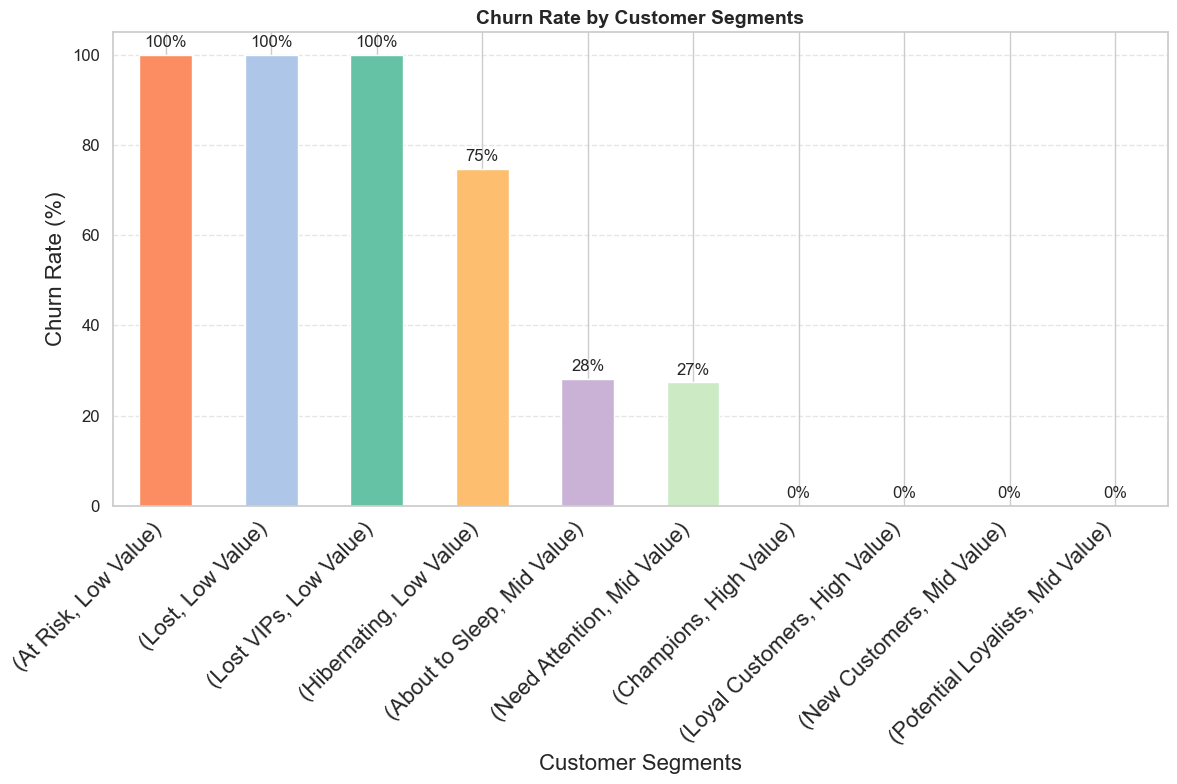

In [145]:
import matplotlib.pyplot as plt

custom_colors = ['#fc8d62', '#aec7e8', '#66c2a5']  # turuncu, mavi, yeşil

# Geri kalanlar için farklı pastel tonlar
pastel_colors = ['#fdbf6f', '#cab2d6', '#ccebc5', '#ffffb3', '#ffed6f', '#b3de69', '#8dd3c7']

# Tüm renkleri birleştir
final_colors = custom_colors + pastel_colors[:len(churn_by_segment_all) - 3]

ax = churn_by_segment_all.sort_values(ascending=False).plot(
    kind='bar', 
    color=final_colors, 
    figsize=(12,8)  # edgecolor kaldırıldı
)

# Başlık ve eksen etiketleri
plt.title("Churn Rate by Customer Segments", fontsize=14, fontweight='bold')
plt.xlabel("Customer Segments", fontsize=16)
plt.ylabel("Churn Rate (%)", fontsize=16)

# Ekseni güzelleştir
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=12)

# Her barın üstüne değer yaz
for i, v in enumerate(churn_by_segment_all.sort_values(ascending=False)):
    ax.text(i, v + 1, f"{v:.0f}%", ha='center', va='bottom', fontsize=12)

# Y eksenine grid çizgileri ekle
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


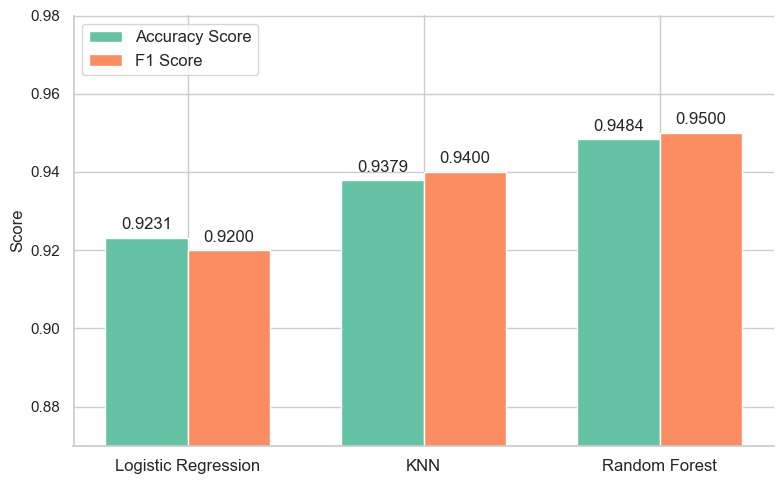

In [146]:
import matplotlib.pyplot as plt
import numpy as np

# Model ve skorlar
models = ['Logistic Regression', 'KNN', 'Random Forest']

# Değerler
accuracy = [0.9231, 0.9379, 0.9484]
f1_score = [0.92, 0.94, 0.95]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy Score', color='#66c2a5')
bars2 = ax.bar(x + width/2, f1_score, width, label='F1 Score', color='#fc8d62')

# Başlık ve etiketler
ax.set_ylabel('Score', fontsize=12)
# ax.set_title('Comparison of Accuracy and F1 Scores for Three Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(loc='upper left', fontsize=12)

# Değerleri çubukların üzerine yaz
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=12)

add_labels(bars1)
add_labels(bars2)

# Grafik stil ayarları
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.87, 0.98)

plt.tight_layout()
plt.show()
